# Nenadgledano ucenje - projekat

Dataset: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption

Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    sex - student's sex (binary: 'F' - female or 'M' - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 'U' - urban or 'R' - rural)
    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
    guardian - student's guardian (nominal: 'mother', 'father' or 'other')
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: yes or no)
    famsup - family educational support (binary: yes or no)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    activities - extra-curricular activities (binary: yes or no)
    nursery - attended nursery school (binary: yes or no)
    higher - wants to take higher education (binary: yes or no)
    internet - Internet access at home (binary: yes or no)
    romantic - with a romantic relationship (binary: yes or no)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    These grades are related with the course subject, Math or Portuguese:

    G1 - first period grade (numeric: from 0 to 20)
    G2 - second period grade (numeric: from 0 to 20)
    G3 - final grade (numeric: from 0 to 20, output target)

1. Priprema podataka

In [1]:
import pandas as pd
import sklearn as scikit
import numpy as np
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "../dataset/student-mat.csv"
pd.set_option("display.max_columns", None)
dataframe_math = pd.read_csv(path, low_memory=False, na_values=["?"])
dataframe_math["subject"] = [0]*dataframe_math.shape[0]
dataframe_math.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  subject  
0     1       3         6   5   6   6        0  
1     1       3         4   5   5   6        0  
2     3       3        10   7   8  10        0  
3     1       5         2  15  14  15        0  
4     2       5         4   6  10  10        0

In [3]:
path = "../dataset/student-por.csv"
dataframe_por = pd.read_csv(path, low_memory=False, na_values=["?"])
dataframe_por["subject"] = [1]*dataframe_por.shape[0]
dataframe_por.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         0       yes     no   no   
3    home   mother           1          3         0        no    yes   no   
4    home   father           1          2         0        no    yes   no   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  subject  
0     1       3         4   0  11  11        1  
1     1       3         2   9  11  11        1  
2     3       3         6  12  13  12        1  
3     1       5         0  14  14  14        1  
4     2       5         0  11  13  13        1

In [4]:
dataframe=pd.concat([dataframe_math,dataframe_por], axis=0)
dataframe.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \
0         no     yes    yes       no       no       4         3      4     1   
1         no      no    yes      yes       no       5         3      3     1   
2         no     yes    yes      yes       no       4         3      2     2   
3        yes     yes    yes      yes      yes       3         2      2     1   
4         no     yes    yes       no       no       4         3      2     1   

   Walc  health  absences  G1  G2  G3  subject  
0     1       3         6   5   6   6        0  
1     1       3         4   5   5   6        0  
2     3       3        10   7   8  10        0  
3     1       5         2  15  14  15        0  
4     2       5         4   6  10  10        0

In [5]:
dataframe.shape

(1044, 34)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [7]:
print("Number Of Rows In The Original DataFrame:", len(dataframe))
print("Number Of Rows After Deduping:", len(dataframe.drop_duplicates()))

Number Of Rows In The Original DataFrame: 1044
Number Of Rows After Deduping: 1044


In [8]:
def get_one_value_cols(df):
    to_drop=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            to_drop.append(col)
    return to_drop

dataframe.drop(get_one_value_cols(dataframe),axis=1,inplace=True)

Enkodiranje

In [9]:
lab_enc = LabelEncoder()
one_hot = LabelBinarizer()

def df_one_hot(df, columns):
    tmp = pd.DataFrame()
    for col in columns:
        res = one_hot.fit_transform(df[col])
        for val in range(0, len(res[0])):
            new_col = res[:, val]
            tmp_col = pd.DataFrame(
                {col + '(' + str(one_hot.classes_[val])+')': new_col})
            tmp = pd.concat((tmp, tmp_col), axis=1)
    return pd.concat((df.reset_index(drop=True), tmp.reset_index(drop=True)), axis=1, join='inner')


In [10]:
lab_coded = ['school','sex','address','Pstatus','schoolsup','famsup',
             'paid','activities','nursery','higher','internet','romantic'
             ,'famsize']
one_coded = ['Mjob','Fjob','reason','guardian']

dataframe_enc = dataframe.copy(deep=True)

for col in lab_coded:
    dataframe_enc[col] = lab_enc.fit_transform(dataframe_enc[col])

dataframe_enc = df_one_hot(dataframe_enc, one_coded)
dataframe_enc.drop(one_coded, axis=1, inplace=True)

dataframe_enc.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  \
0       0    0   18        1        0        0     4     4           2   
1       0    0   17        1        0        1     1     1           1   
2       0    0   15        1        1        1     1     1           1   
3       0    0   15        1        0        1     4     2           1   
4       0    0   16        1        0        1     3     3           1   

   studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  \
0          2         0          1       0     0           0        1       1   
1          2         0          0       1     0           0        0       1   
2          2         3          1       0     1           0        1       1   
3          3         0          0       1     1           1        1       1   
4          2         0          0       1     1           0        1       1   

   internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  \
0         0         0       4         3      4     1     1       3         6   
1         1         0       5         3      3     1     1       3         4   
2         1         0       4         3      2     2     3       3        10   
3         1         1       3         2      2     1     1       5         2   
4         0         0       4         3      2     1     2       5         4   

   G1  G2  G3  subject  Mjob(at_home)  Mjob(health)  Mjob(other)  \
0   5   6   6        0              1             0            0   
1   5   5   6        0              1             0            0   
2   7   8  10        0              1             0            0   
3  15  14  15        0              0             1            0   
4   6  10  10        0              0             0            1   

   Mjob(services)  Mjob(teacher)  Fjob(at_home)  Fjob(health)  Fjob(other)  \
0               0              0              0             0            0   
1               0              0              0             0            1   
2               0              0              0             0            1   
3               0              0              0             0            0   
4               0              0              0             0            1   

   Fjob(services)  Fjob(teacher)  reason(course)  reason(home)  reason(other)  \
0               0              1               1             0              0   
1               0              0               1             0              0   
2               0              0               0             0              1   
3               1              0               0             1              0   
4               0              0               0             1              0   

   reason(reputation)  guardian(father)  guardian(mother)  guardian(other)  
0                   0                 0                 1                0  
1                   0                 1                 0                0  
2                   0                 0                 1                0  
3                   0                 0                 1                0  
4                   0                 1                 0                0

In [11]:
dataframe_enc.shape

(1044, 47)

In [12]:
dataframe_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   school              1044 non-null   int64
 1   sex                 1044 non-null   int64
 2   age                 1044 non-null   int64
 3   address             1044 non-null   int64
 4   famsize             1044 non-null   int64
 5   Pstatus             1044 non-null   int64
 6   Medu                1044 non-null   int64
 7   Fedu                1044 non-null   int64
 8   traveltime          1044 non-null   int64
 9   studytime           1044 non-null   int64
 10  failures            1044 non-null   int64
 11  schoolsup           1044 non-null   int64
 12  famsup              1044 non-null   int64
 13  paid                1044 non-null   int64
 14  activities          1044 non-null   int64
 15  nursery             1044 non-null   int64
 16  higher              1044 non-null   int64


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5]),
 [Text(0, 0.5, 'school'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'age'),
  Text(0, 3.5, 'address'),
  Text(0, 4.5, 'famsize'),
  Text(0, 5.5, 'Pstatus'),
  Text(0, 6.5, 'Medu'),
  Text(0, 7.5, 'Fedu'),
  Text(0, 8.5, 'traveltime'),
  Text(0, 9.5, 'studytime'),
  Text(0, 10.5, 'failures'),
  Text(0, 11.5, 'schoolsup'),
  Text(0, 12.5, 'famsup'),
  Text(0, 13.5, 'paid'),
  Text(0, 14.5, 'activities'),
  Text(0, 15.5, 'nursery'),
  Text(0, 16.5, 'higher'),
  Text(0, 17.5, 'internet'),
  Text(0, 18.5, 'romantic'),
  Text(0, 19.5, 'famrel'),
  Text(0, 20.5, 'freetime'),
  Text(0, 21.5, 'goout'),
  Text(0, 22.5, 'Dalc'),
  Text(0, 23.5, 'Walc'),
  Text(0, 24.5, 'health'),
  

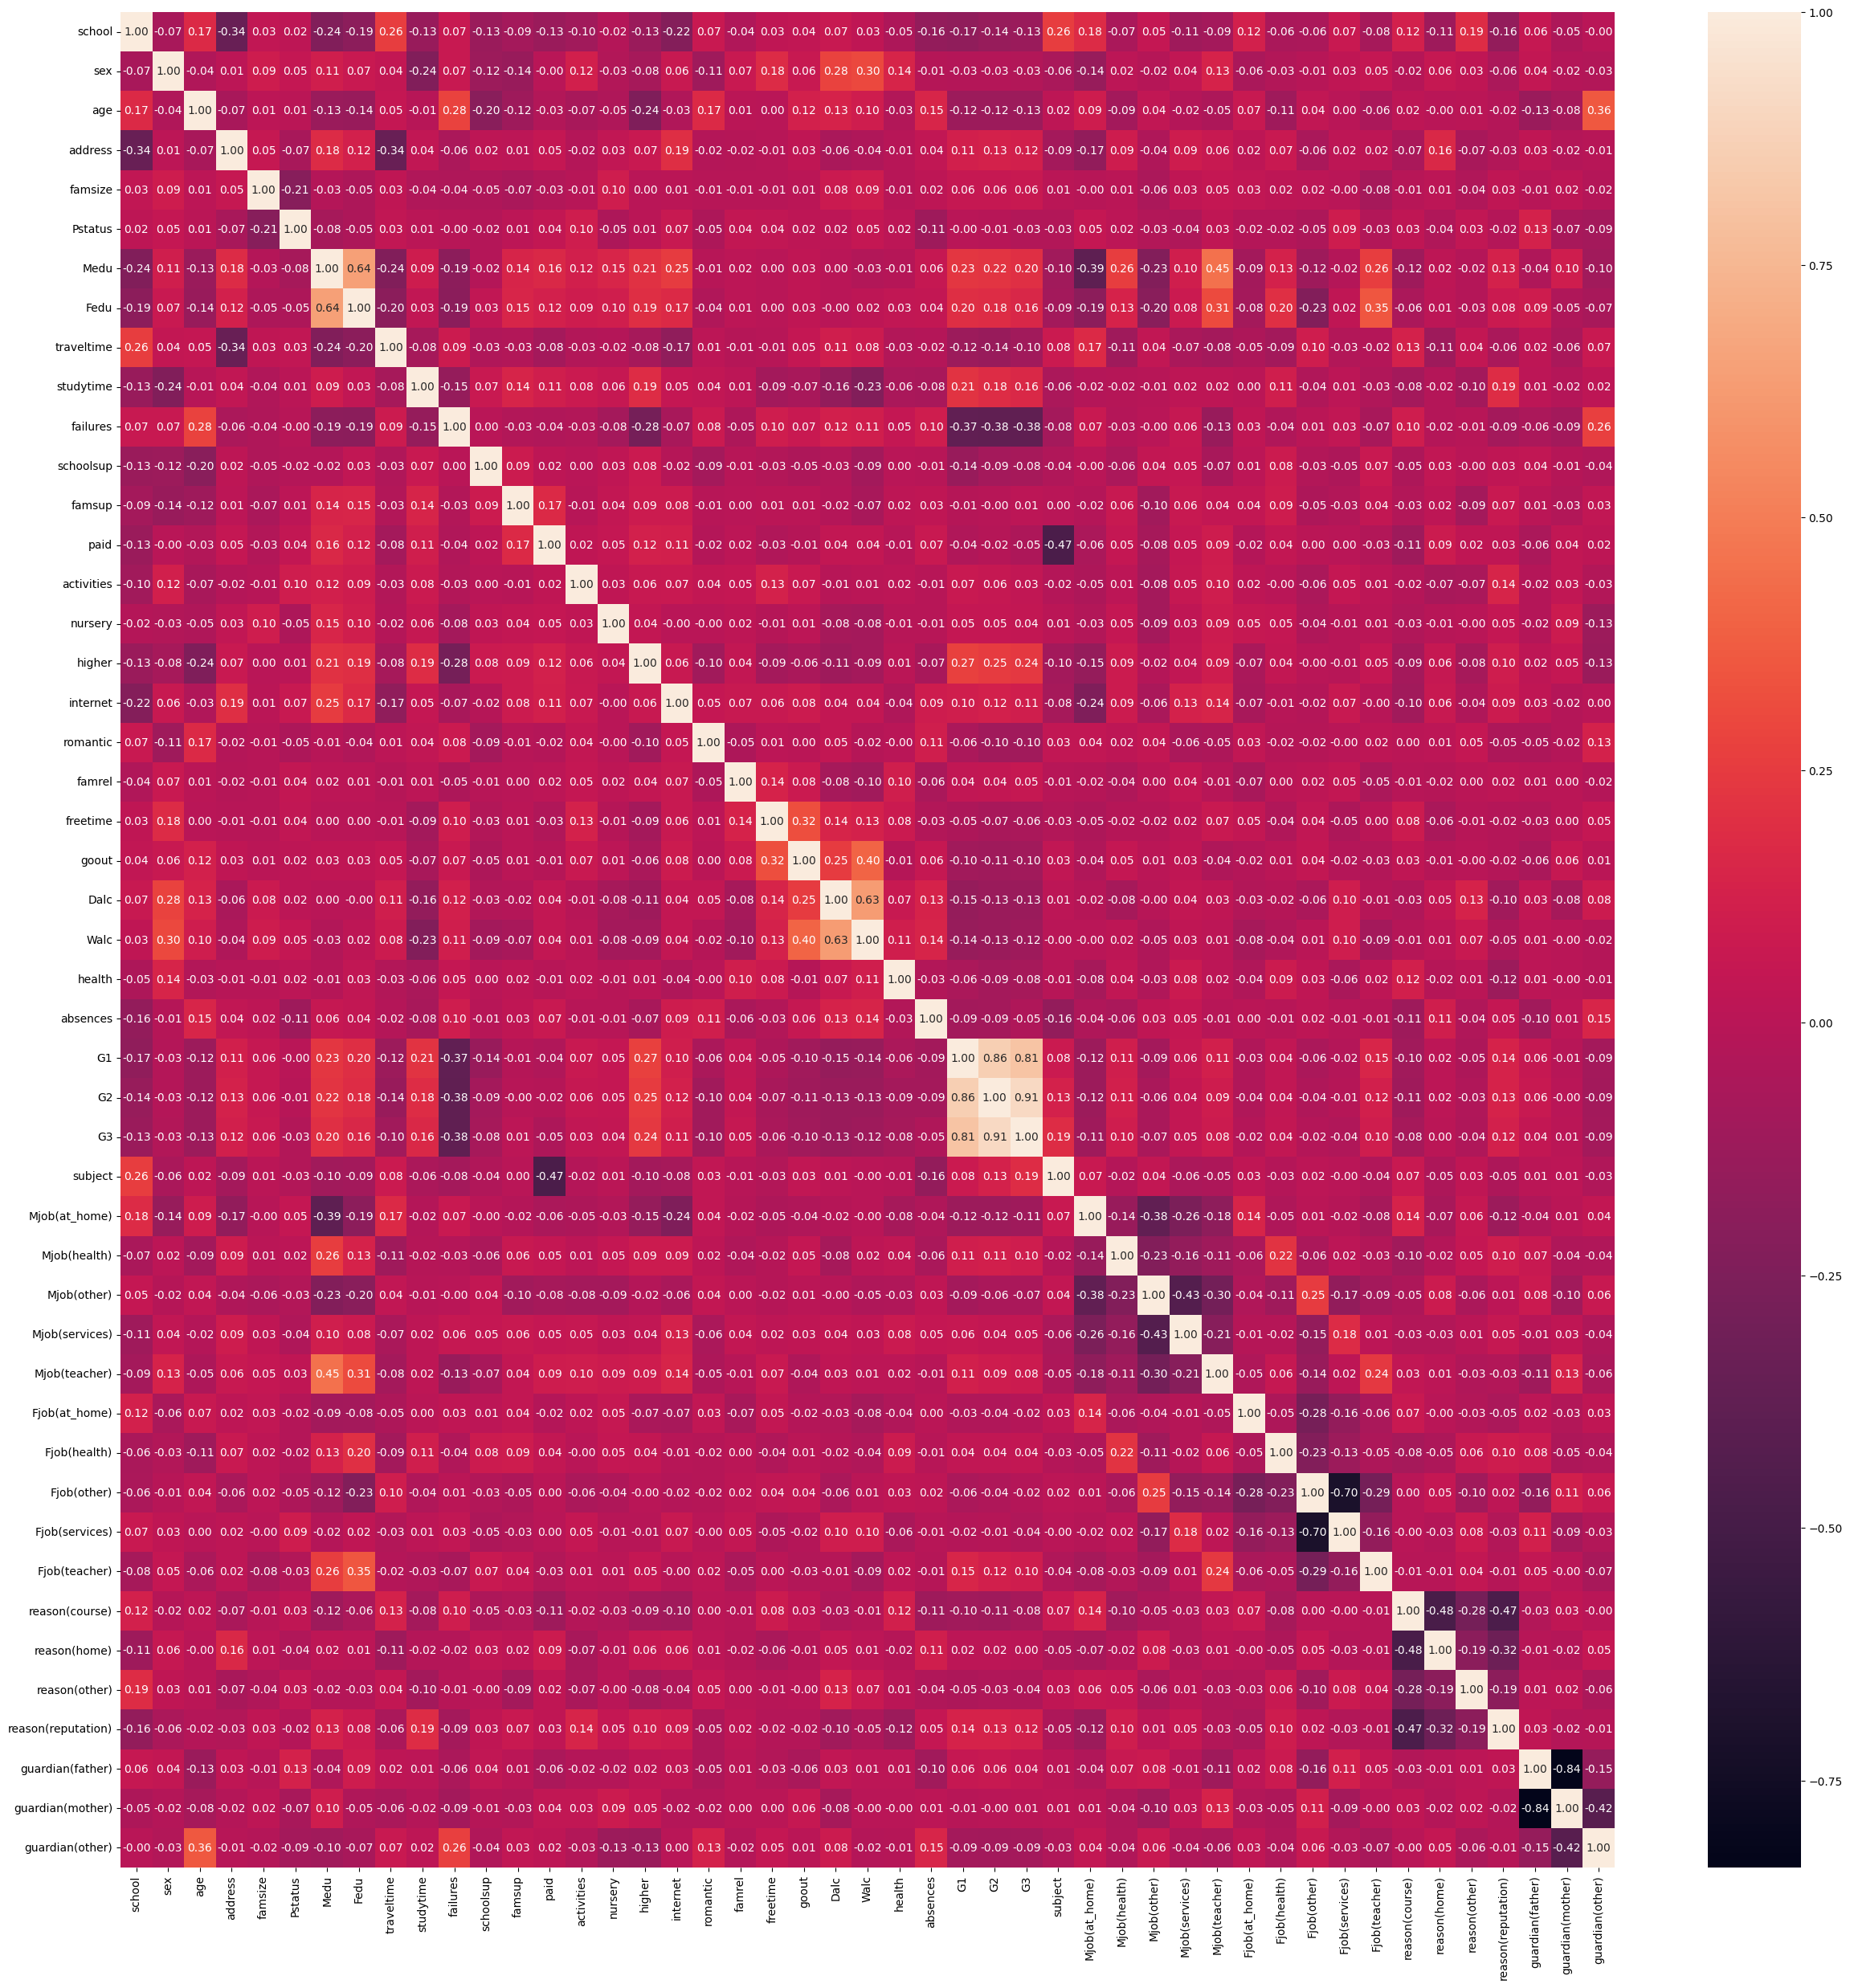

In [13]:
plt.figure(figsize=(30,30))
sns.heatmap(dataframe_enc.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

/tmp/ipykernel_25181/85834134.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe_enc["G3"],color='cyan',ax=ax)


Text(0.5, 1.0, 'Distribution of grades')

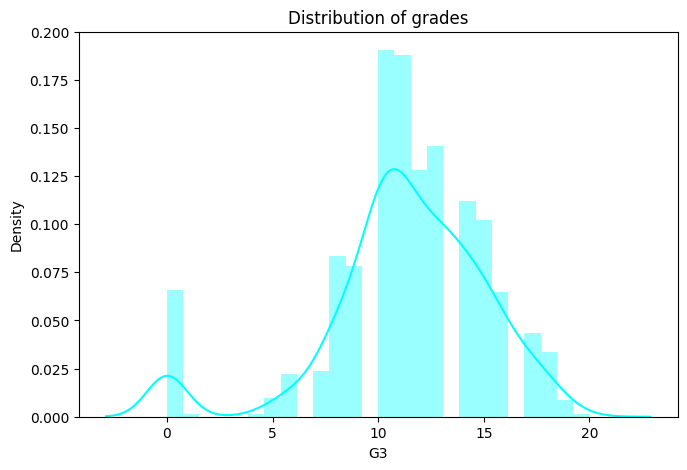

In [14]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(dataframe_enc["G3"],color='cyan',ax=ax)
ax.set_title('Distribution of grades')

In [15]:
to_plot=[x for x in dataframe_enc.columns if x not in lab_coded and '(' not in x and x != 'subject']
dataframe_enc[to_plot].describe()

age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     4.000000     3.000000     2.000000     1.000000   
50%       0.000000     4.000000     3.000000     3.000000     1.000000   
75%       0.000000     5.000000     4.000000     4.000000     2.000000   
max       3.000000     5.000000     5.000000     5.000000     5.000000   

              Walc       health     absences           G1           G2  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      2.284483     3.543103     4.434866    11.213602    11.246169   
std       1.285105     1.424703     6.210017     2.983394     3.285071   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%       1.000000     3.000000     0.000000     9.000000     9.000000   
50%       2.000000     4.000000     2.000000    11.000000    11.000000   
75%       3.000000     5.000000     6.000000    13.000000    13.000000   
max       5.000000     5.000000    75.000000    19.000000    19.000000   

                G3  
count  1044.000000  
mean     11.341954  
std       3.864796  
min       0.000000  
25%      10.000000  
50%      11.000000  
75%      14.000000  
max      20.000000

In [16]:
dataframe_enc.boxplot(column=to_plot, figsize=(20,10))

<AxesSubplot: >

In [17]:
dataframe['sex'].value_counts().plot(kind='pie')

<AxesSubplot: ylabel='sex'>

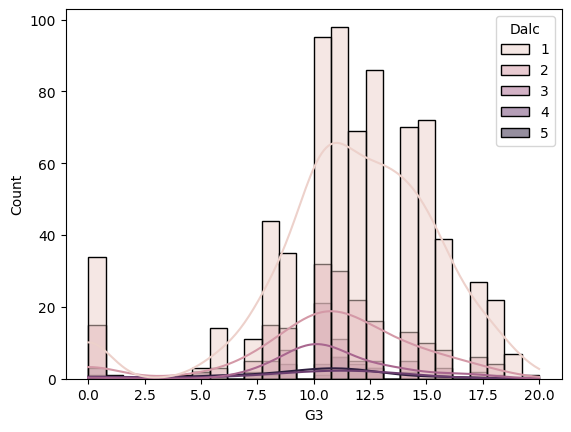

In [18]:
sns.histplot(data = dataframe_enc, x = dataframe_enc['G3'], kde = True, hue = dataframe_enc['Dalc'].sort_values(ascending = True))
sns.set(rc={'figure.figsize':(20,9)})

In [19]:
sns.histplot(data = dataframe_enc, x = dataframe_enc['G3'], kde = True, hue = dataframe_enc['Walc'].sort_values(ascending = True))
sns.set(rc={'figure.figsize':(20,9)})

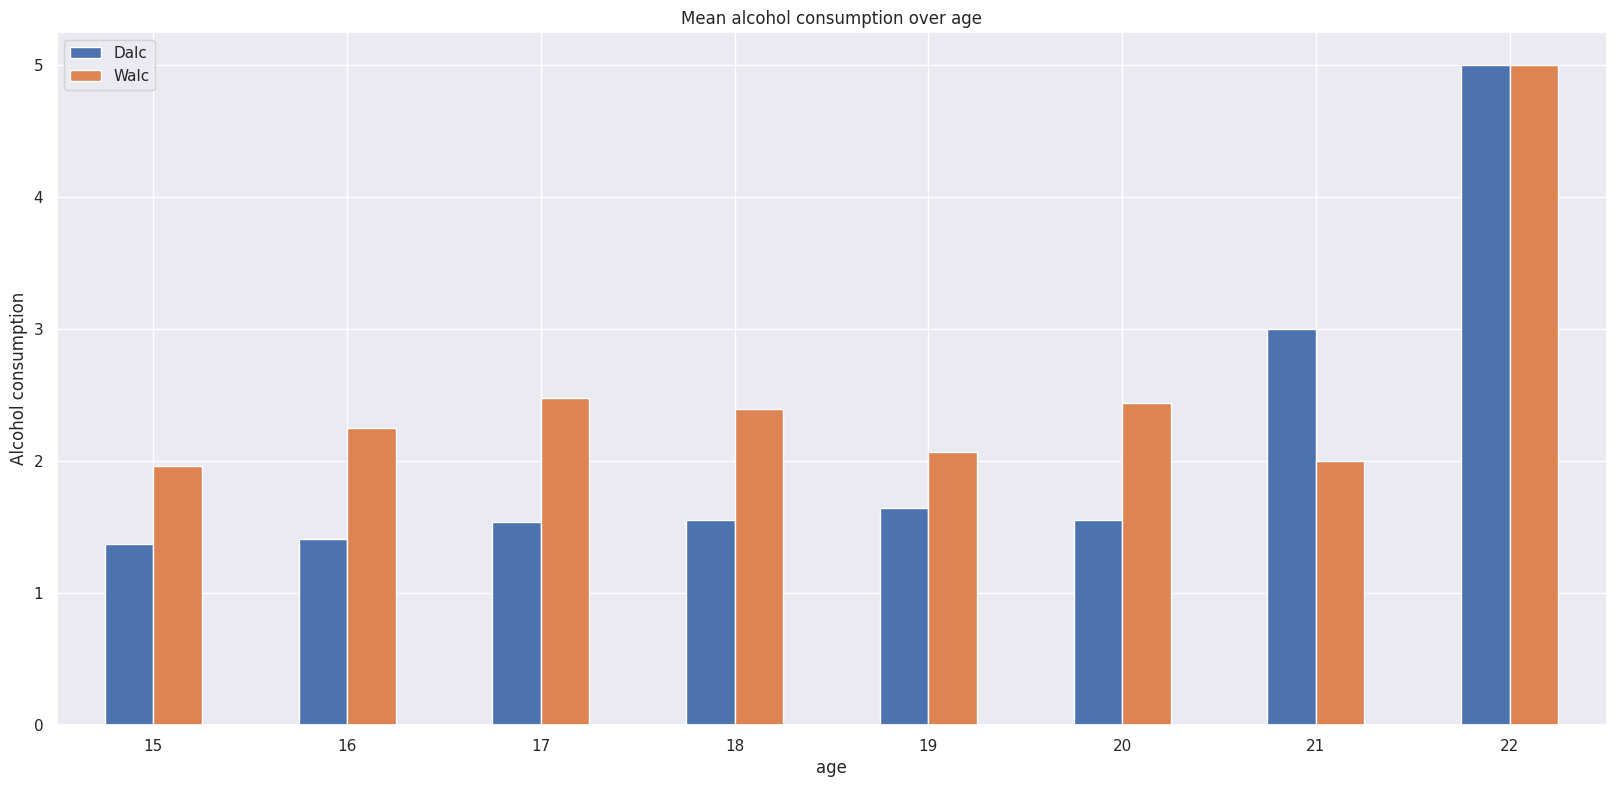

In [20]:
dataframe_enc.groupby('age')[['Dalc', 'Walc']].mean().plot(kind='bar')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=0)
plt.title('Mean alcohol consumption over age')
plt.show()



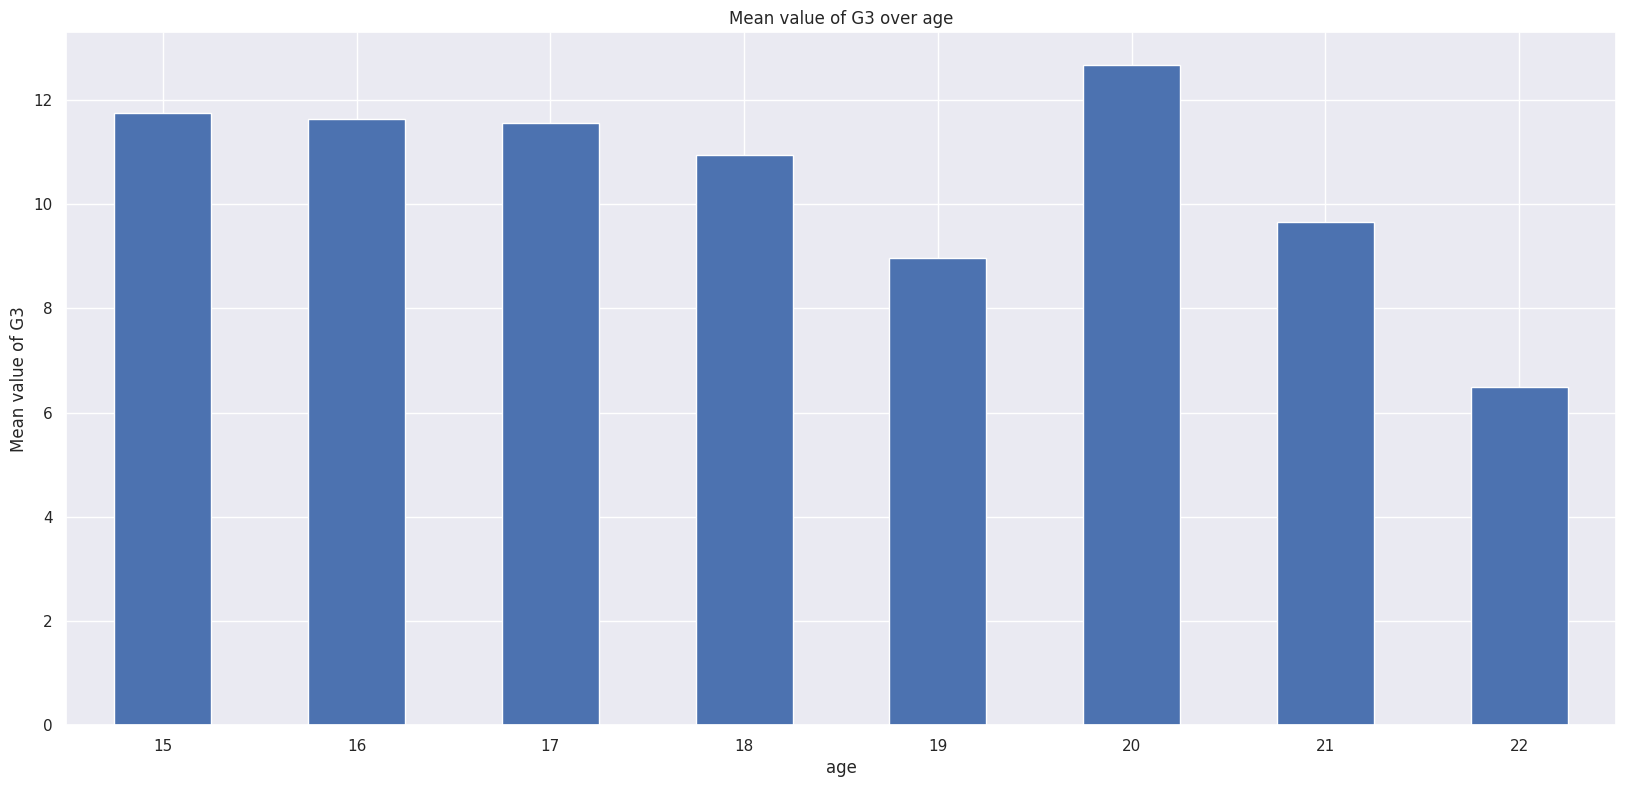

In [21]:
dataframe_enc.groupby('age')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over age')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()



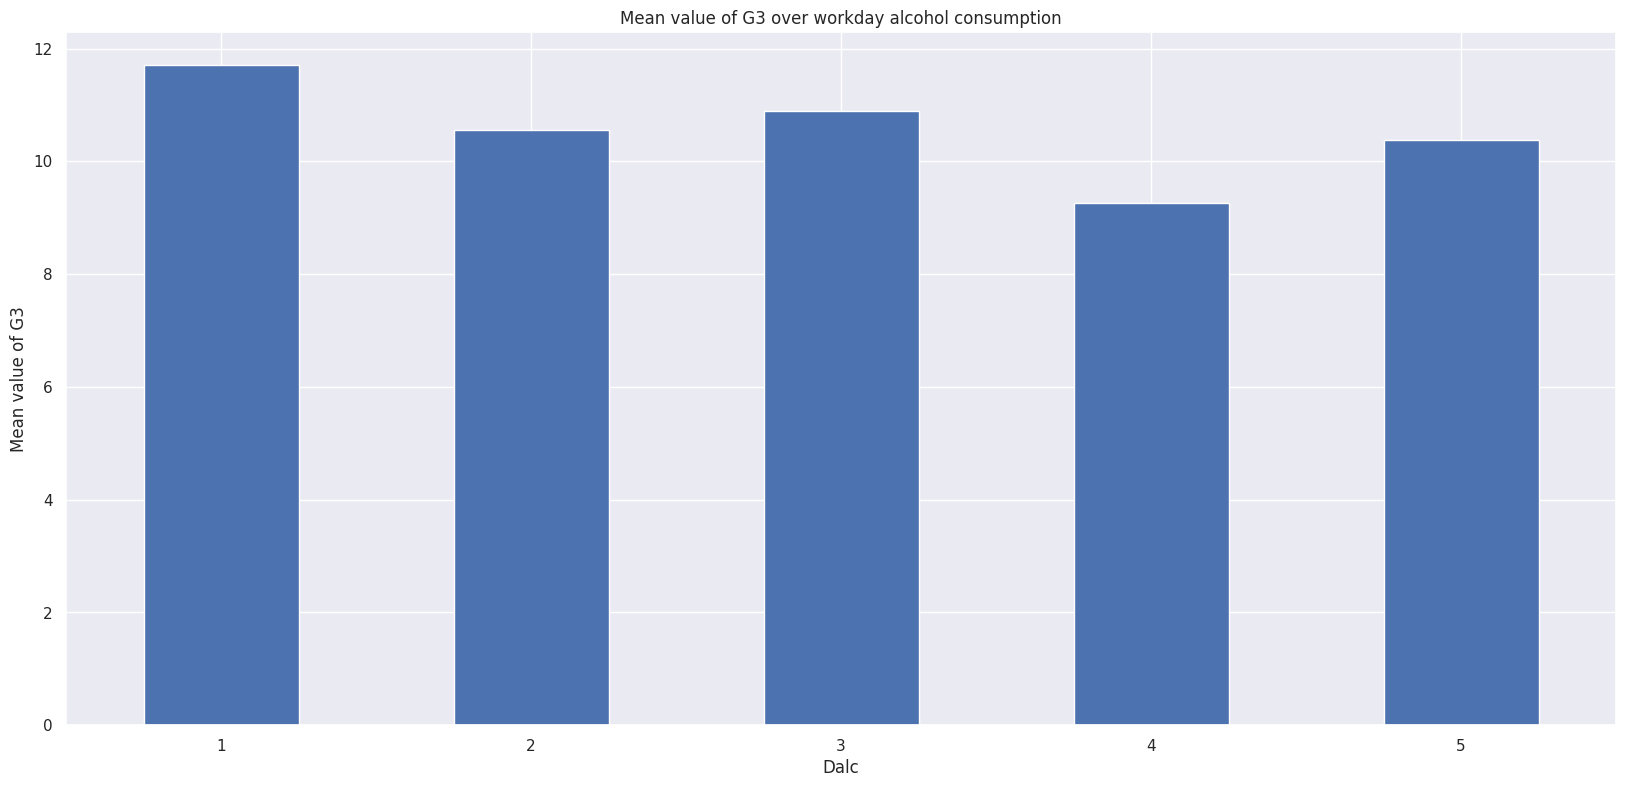

In [22]:
dataframe_enc.groupby('Dalc')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over workday alcohol consumption')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

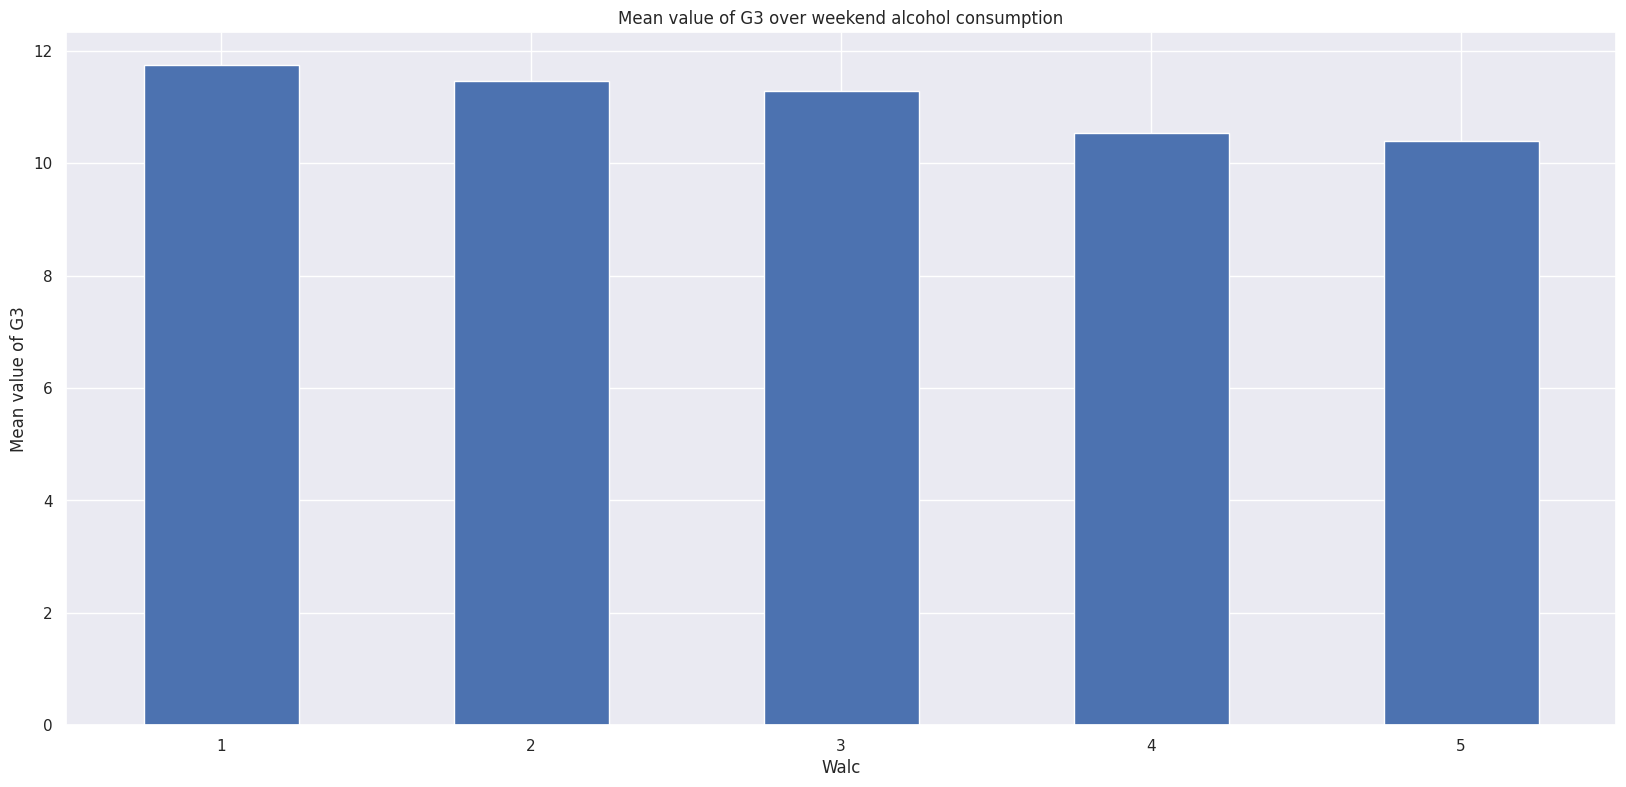

In [23]:
dataframe_enc.groupby('Walc')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over weekend alcohol consumption')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

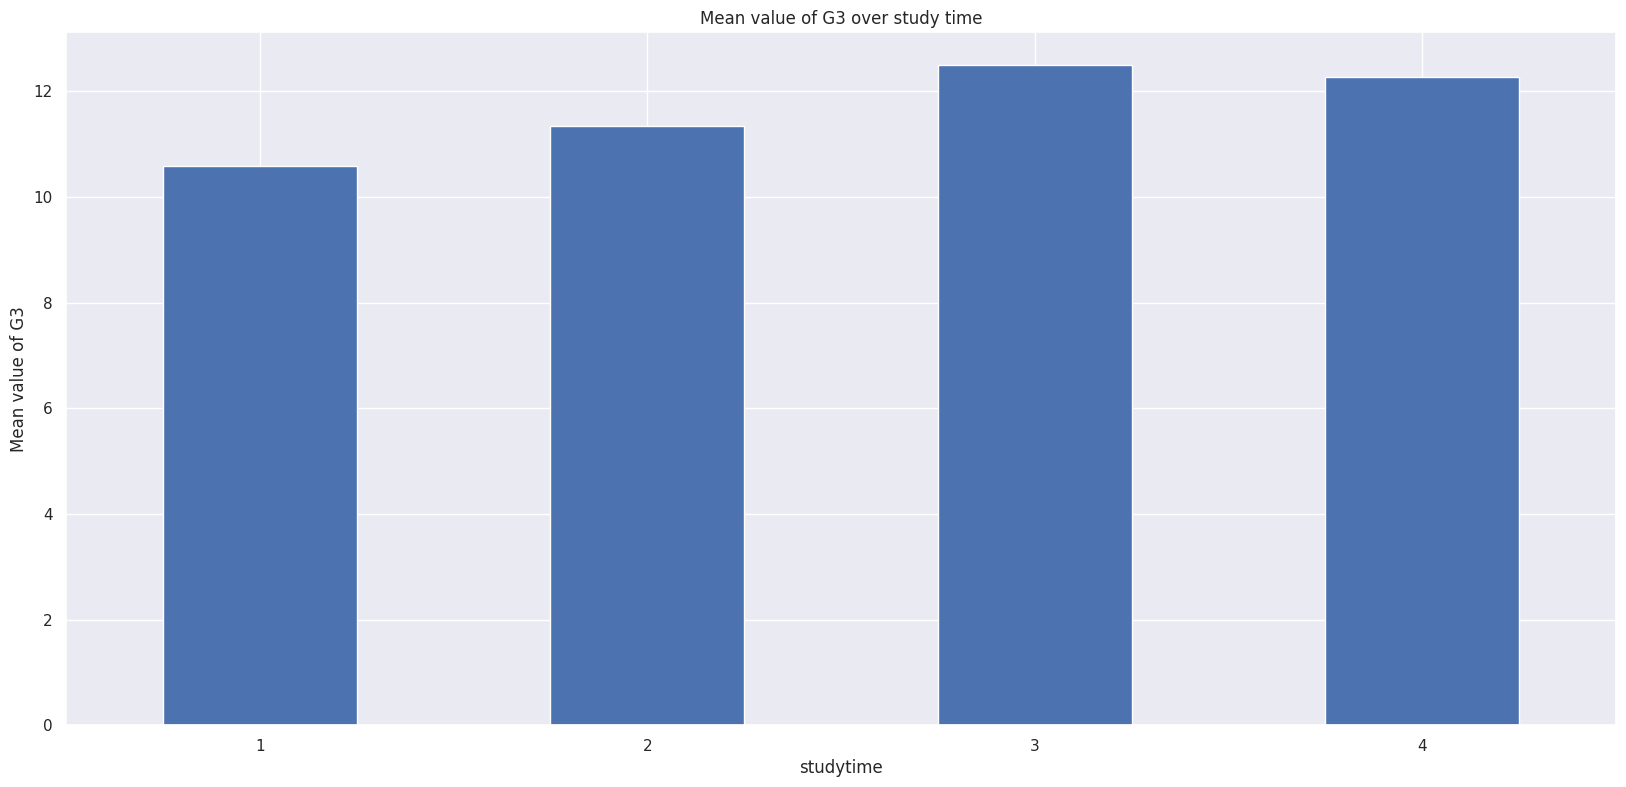

In [24]:
dataframe_enc.groupby('studytime')['G3'].mean().plot(kind='bar')
plt.title('Mean value of G3 over study time')
plt.ylabel('Mean value of G3')
plt.xticks(rotation=0)
plt.show()

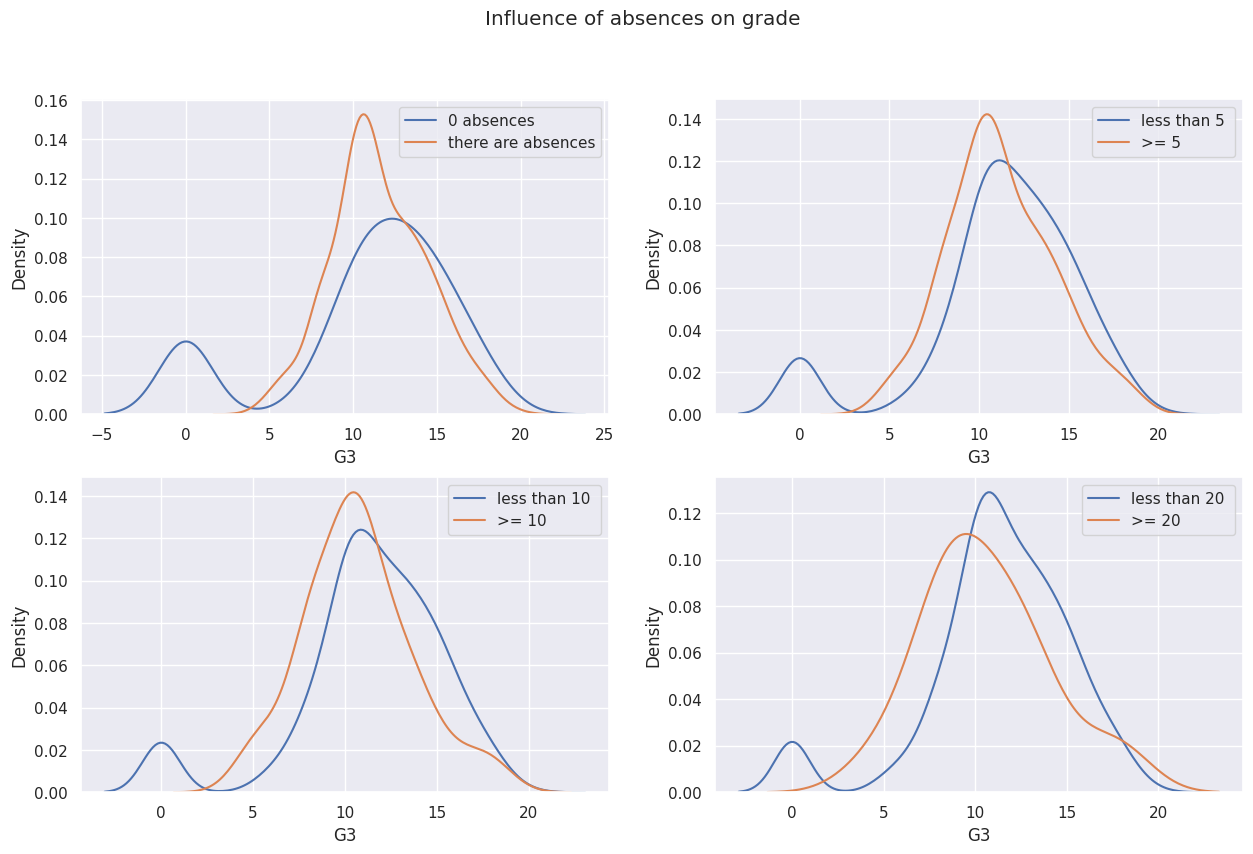

In [25]:
_, axes = plt.subplots(2, 2, figsize=(15,9))
_.suptitle('Influence of absences on grade')
sns.kdeplot(dataframe_enc.query('absences == 0')['G3'], label='0 absences', ax=axes[0, 0])
sns.kdeplot(dataframe_enc.query('absences > 0')['G3'], label='there are absences', ax=axes[0, 0])
axes[0, 0].legend()

sns.kdeplot(dataframe_enc.query('absences < 5')['G3'], label='less than 5 ', ax=axes[0, 1])
sns.kdeplot(dataframe_enc.query('absences >= 5 ')['G3'], label='>= 5', ax=axes[0, 1])
axes[0, 1].legend()

sns.kdeplot(dataframe_enc.query('absences < 10')['G3'], label='less than 10 ', ax=axes[1, 0])
sns.kdeplot(dataframe_enc.query('absences >= 10 ')['G3'], label='>= 10', ax=axes[1, 0])
axes[1, 0].legend()

sns.kdeplot(dataframe_enc.query('absences < 20')['G3'], label='less than 20 ', ax=axes[1, 1])
sns.kdeplot(dataframe_enc.query('absences >= 20 ')['G3'], label='>= 20', ax=axes[1, 1])
axes[1, 1].legend()
plt.show()

In [26]:
# sns.pairplot(dataframe_enc) #~35min

![alt text](./images/pairplotFull.png "")

In [27]:
from sklearn.cluster import KMeans

In [28]:
from yellowbrick.cluster import KElbowVisualizer

def elbow(df,max_cluster_num):
    # Quick examination of elbow method to find numbers of clusters to make.
    print('Elbow Method to determine the number of clusters to be formed:')
    Elbow_M = KElbowVisualizer(KMeans(), k=max_cluster_num)
    Elbow_M.fit(df)
    Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


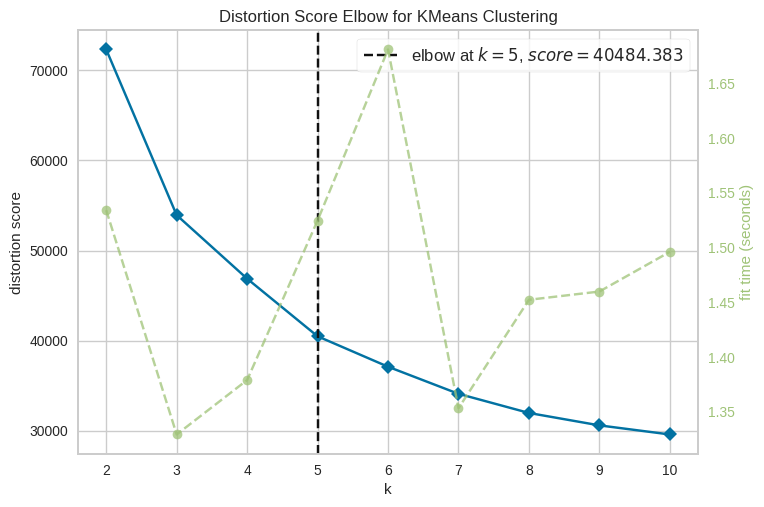

In [29]:
elbow(dataframe_enc,10)

In [30]:
from sklearn.cluster import AgglomerativeClustering

def kmeans_cluster(df,cluster_num):
    dataframe_cluster = df.copy(deep=True)

    AC=KMeans(n_clusters=cluster_num)
    yhat_AC = AC.fit_predict(dataframe_enc)
    dataframe_cluster["Clusters"] = yhat_AC

    #Plotting the clusters
    pl = sns.countplot(x=dataframe_cluster["Clusters"])
    pl.set_title("Distribution Of The Clusters")
    plt.show()
    return dataframe_cluster

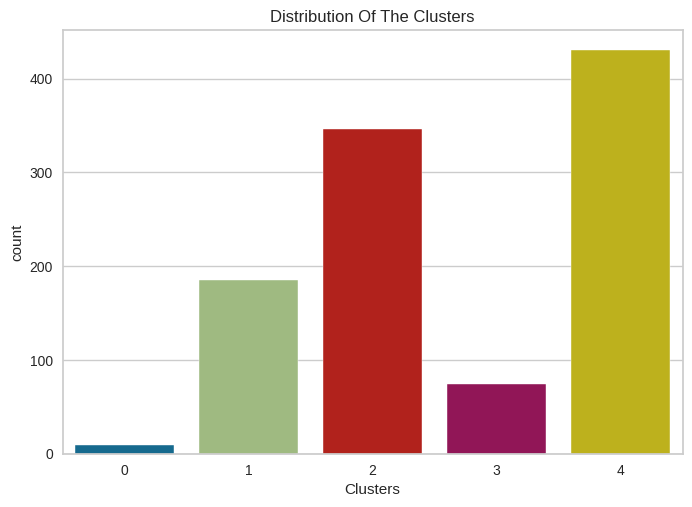

In [31]:
dataframe_clustered= kmeans_cluster(dataframe_enc,5)

In [32]:
dataframe_clustered['Clusters'].value_counts()

4    430
2    346
1    185
3     74
0      9
Name: Clusters, dtype: int64

In [33]:
def box_plot_cluster(df,other_columns):
    for other in other_columns:
        plt.figure()
        pl=sns.boxenplot(y=df[other],x=df["Clusters"], palette=["#FF0000","#00FF00", "#4444FF","#FFFF00","#000000"])
        pl.set_title(other)

        plt.show()


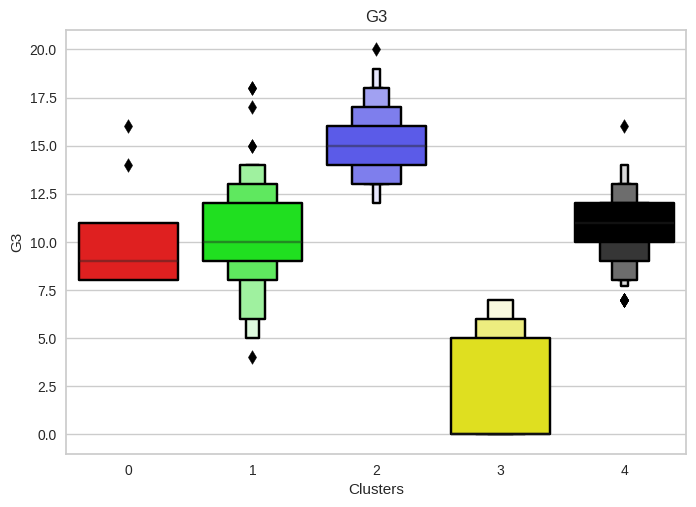

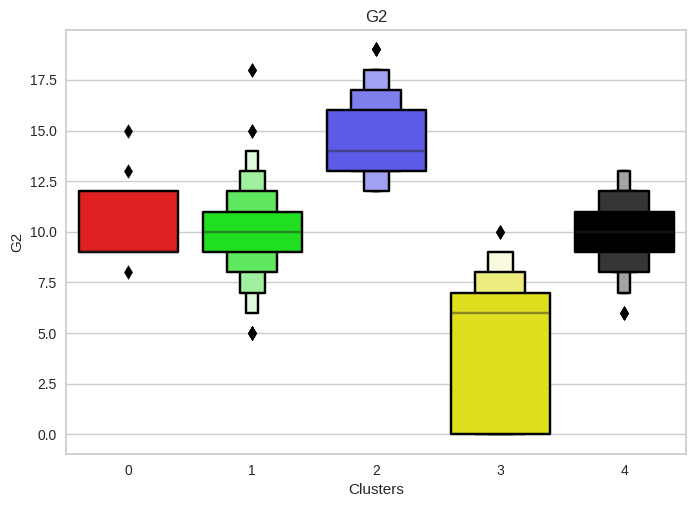

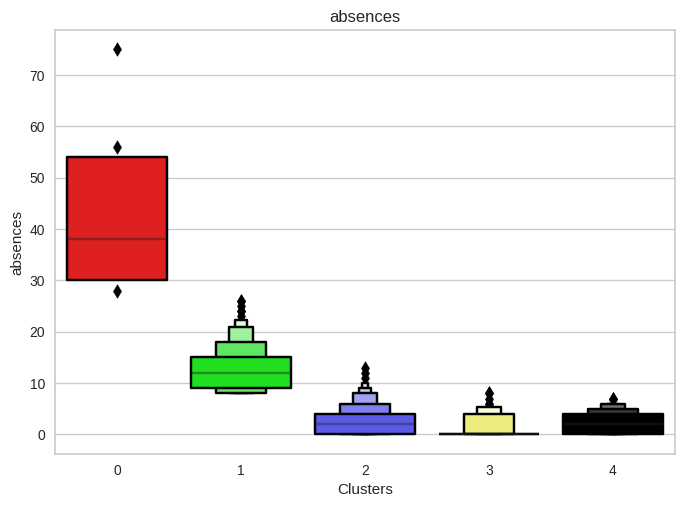

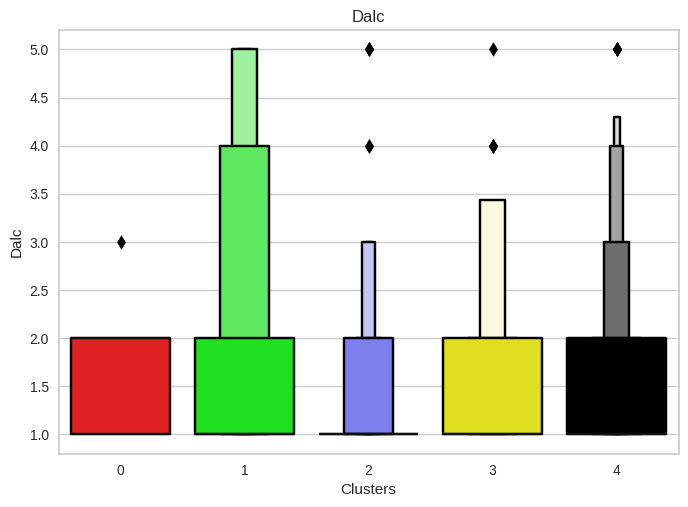

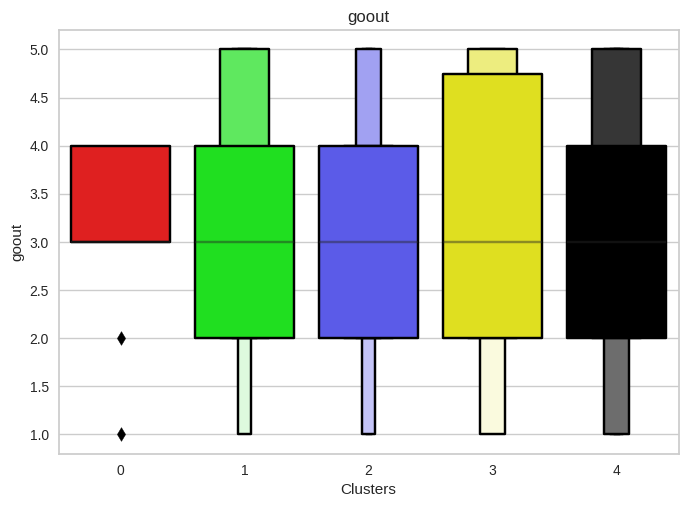

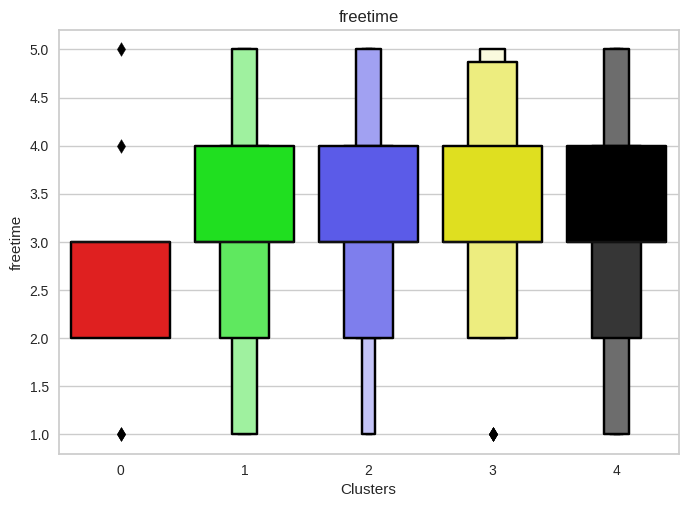

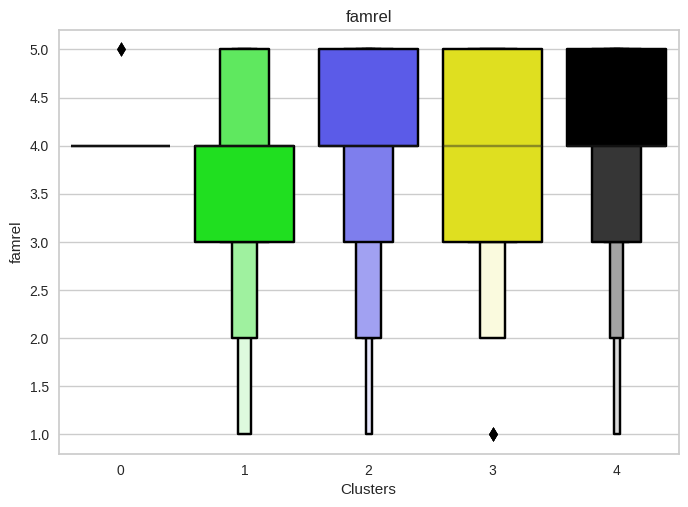

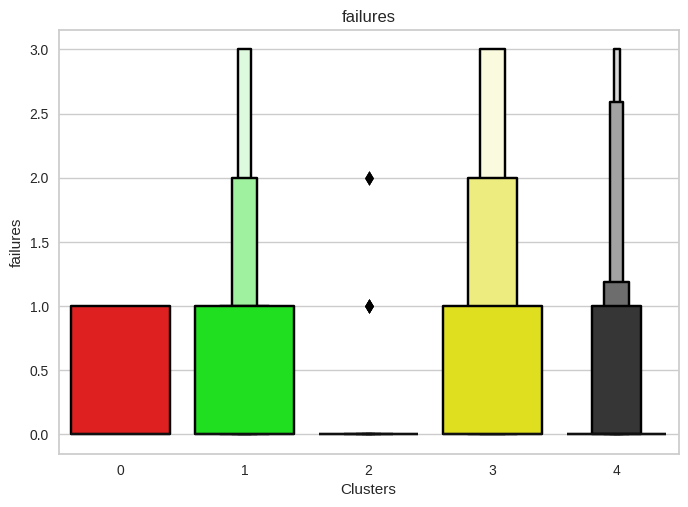

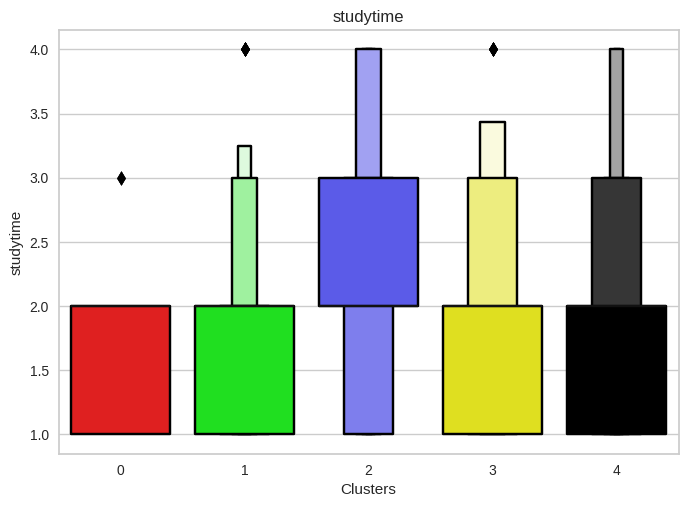

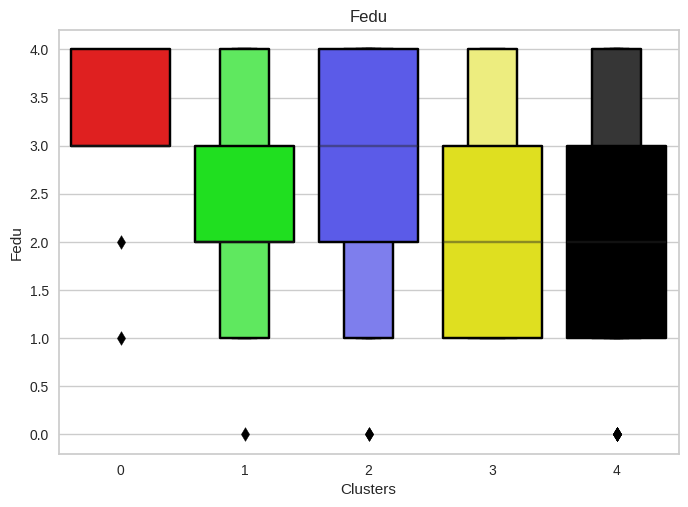

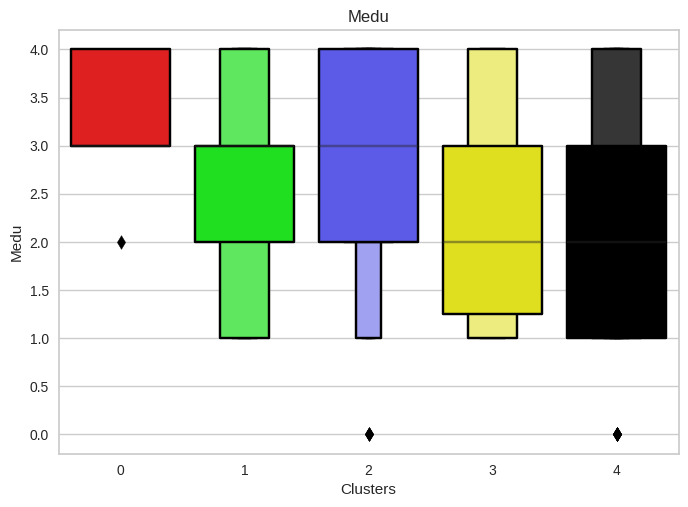

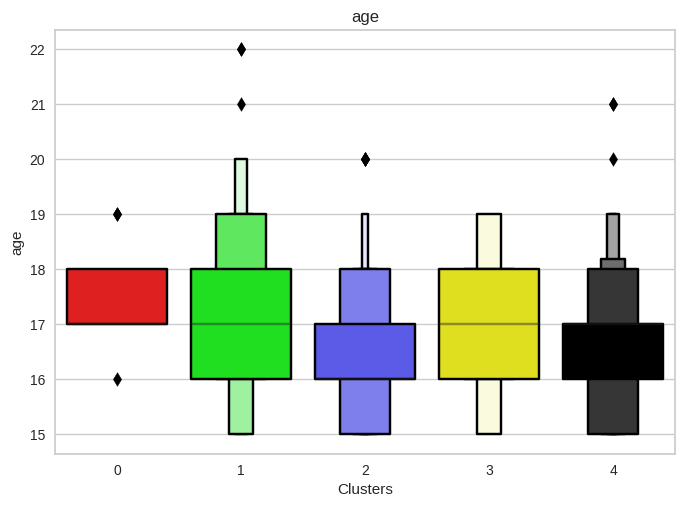

In [34]:
box_plot_cluster(dataframe_clustered,["G3","G2","G1","absences","Walc","Dalc","goout","freetime","famrel","failures","studytime","traveltime","Fedu","Medu","age"])

In [35]:
def joint_plot_cluster(df,main_colum,other_columns):
    for other in other_columns:
        if other == main_colum:
            continue
        pl = sns.jointplot(data = df,x=df[main_colum], y=df[other],hue=df["Clusters"],kind="kde",palette=["#FF0000","#00FF00", "#4444FF","#FFFF00","#000000"])


        plt.show()

/home/milos/.local/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


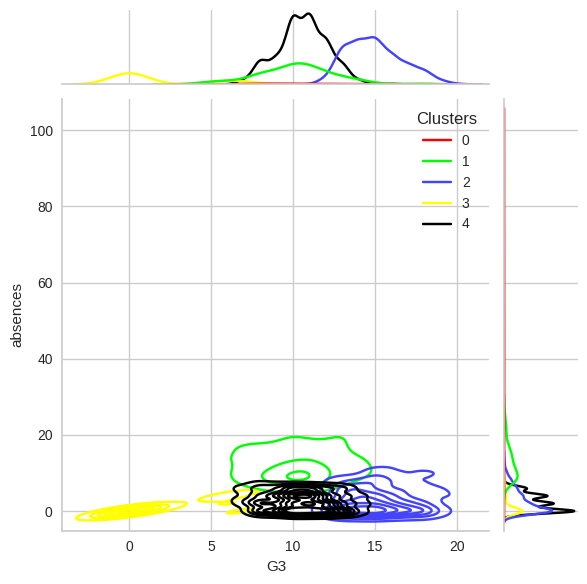

In [36]:
joint_plot_cluster(dataframe_clustered,'G3',["absences"] )

In [37]:
def count_plot_cluster(df,other_columns):
    for other in other_columns:
        df1 = df.groupby('Clusters')[other].value_counts(normalize=True)
        df1 = df1.mul(100)
        df1 = df1.rename('percent').reset_index()
        plt.figure()
        pl = sns.catplot(x='Clusters',y='percent',hue=other,kind='bar',data=df1)
        # pl = sns.countplot(x=df[other],hue=df["Clusters"])
        plt.show()

<Figure size 800x550 with 0 Axes>

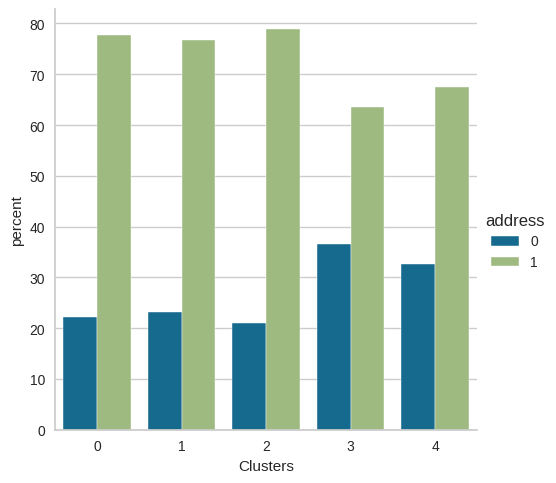

<Figure size 800x550 with 0 Axes>

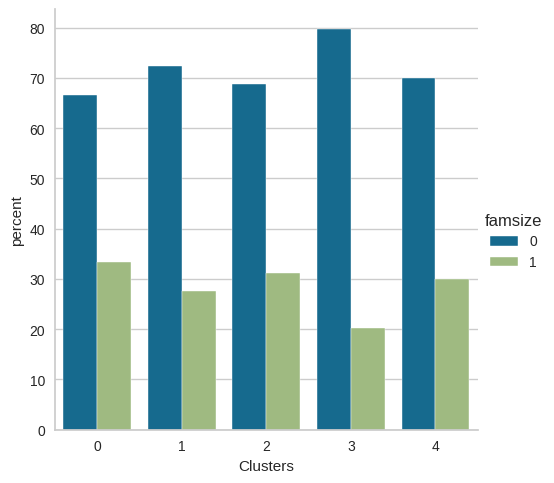

<Figure size 800x550 with 0 Axes>

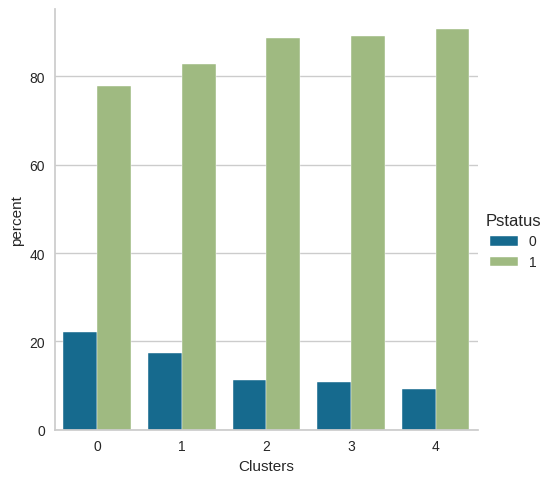

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

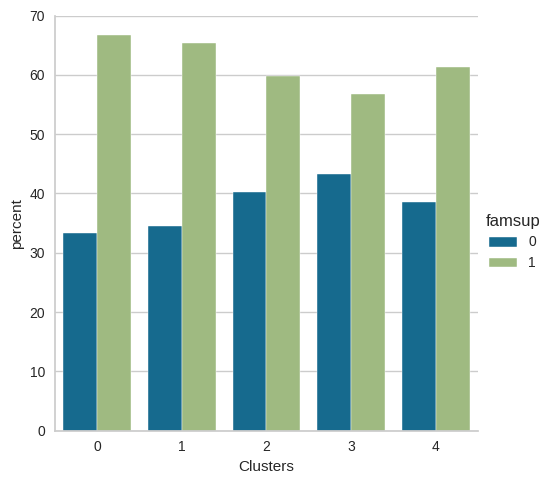

<Figure size 800x550 with 0 Axes>

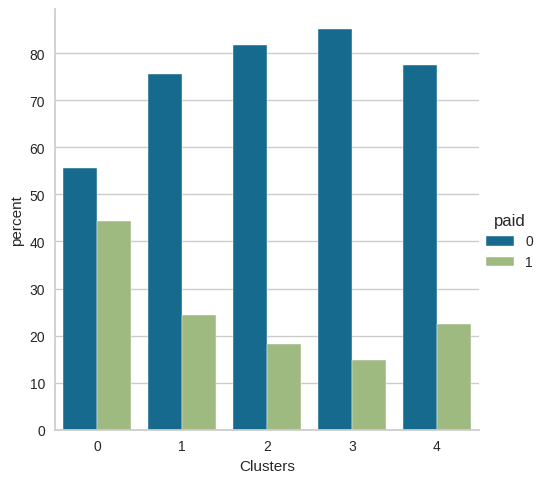

<Figure size 800x550 with 0 Axes>

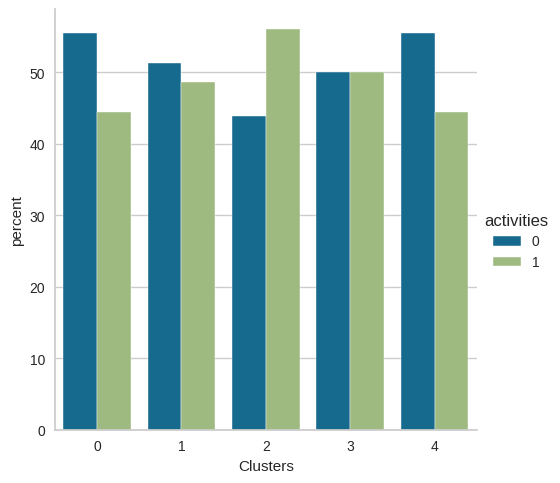

<Figure size 800x550 with 0 Axes>

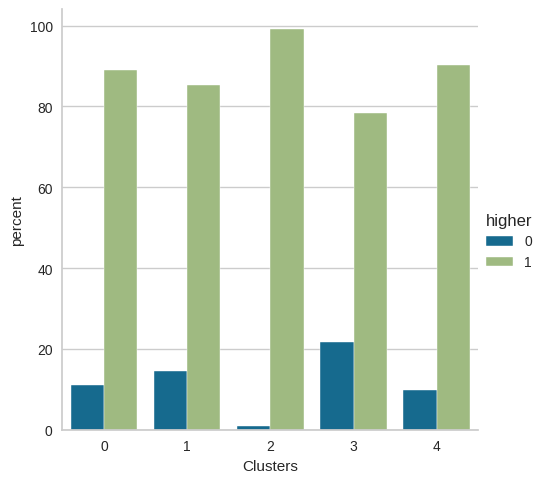

<Figure size 800x550 with 0 Axes>

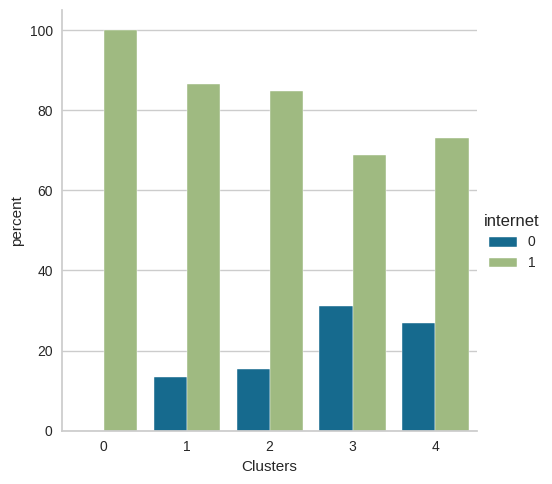

<Figure size 800x550 with 0 Axes>

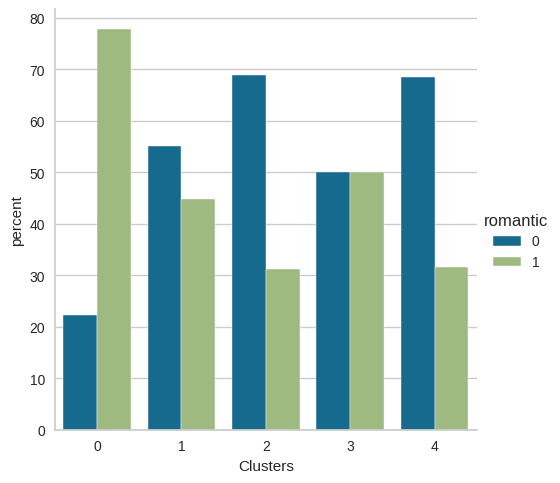

<Figure size 800x550 with 0 Axes>

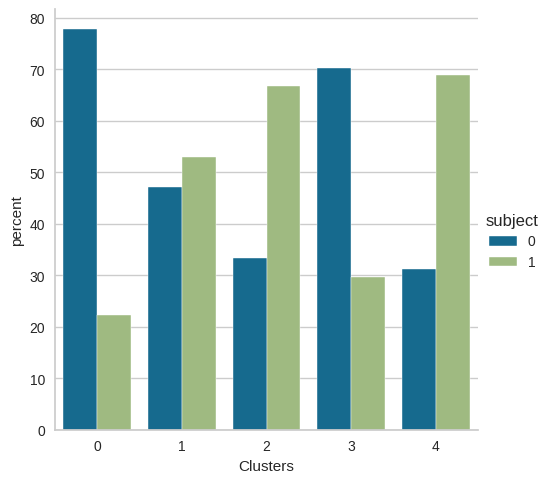

<Figure size 800x550 with 0 Axes>

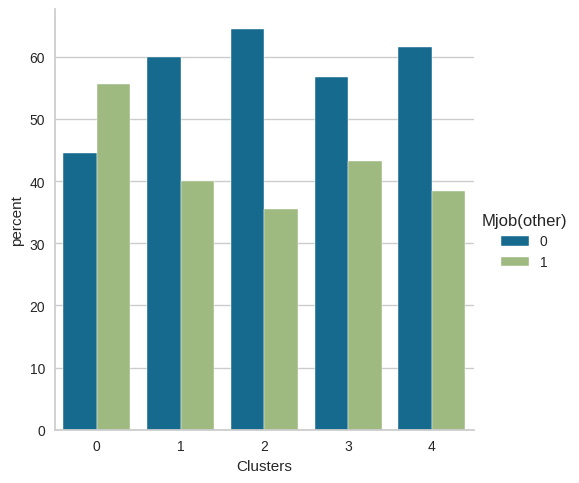

<Figure size 800x550 with 0 Axes>

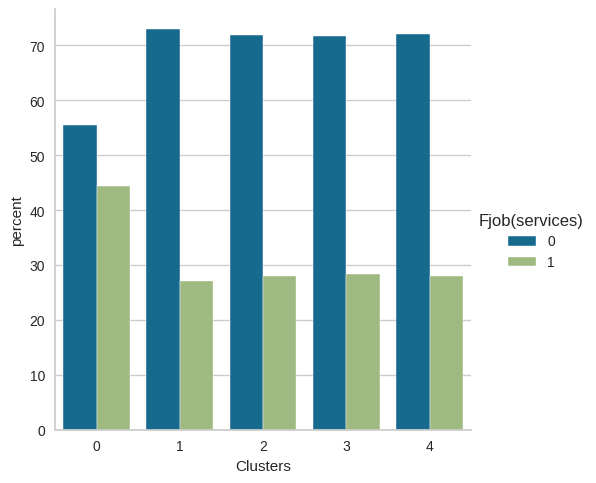

<Figure size 800x550 with 0 Axes>

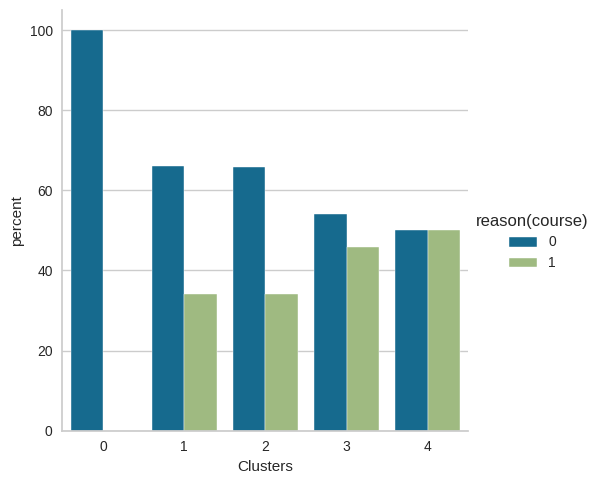

<Figure size 800x550 with 0 Axes>

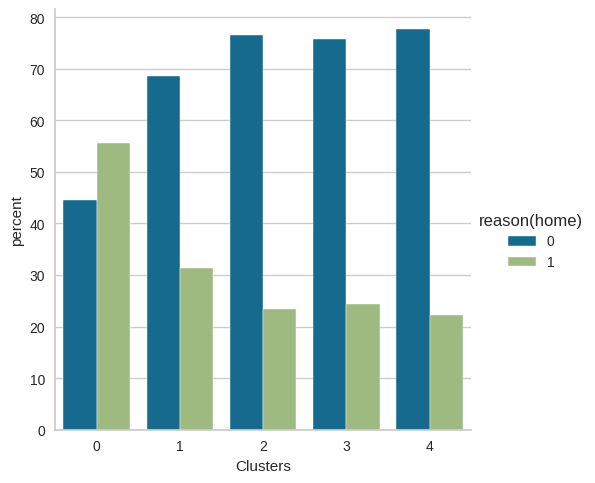

<Figure size 800x550 with 0 Axes>

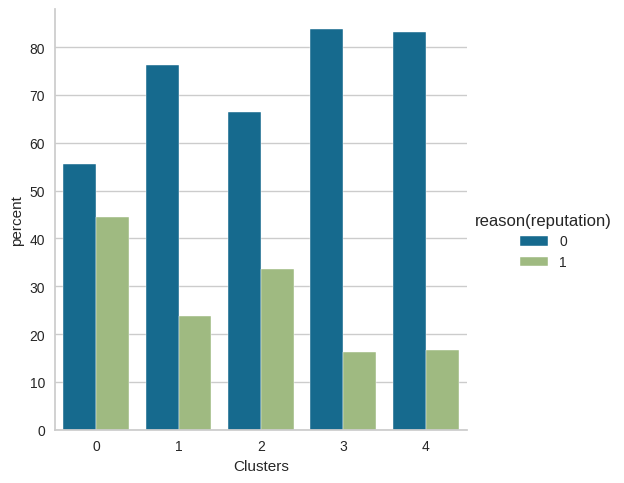

<Figure size 800x550 with 0 Axes>

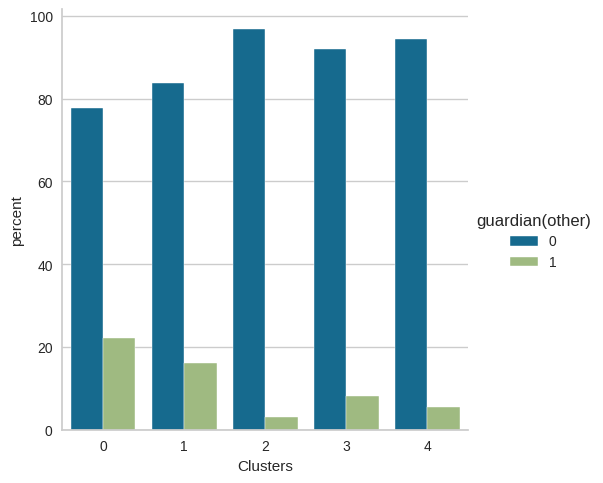

In [38]:
count_plot_cluster(dataframe_clustered,['address','famsize','Pstatus','schoolsup','famsup','paid','activities','higher'
                                    ,'internet','romantic','subject','Mjob(other)','Fjob(services)','reason(course)'
                                    ,'reason(home)','reason(reputation)','guardian(other)'])

In [39]:
dataframe_clustered.groupby("Clusters").median()

school  sex   age  address  famsize  Pstatus  Medu  Fedu  \
Clusters                                                             
0            0.0  0.0  17.0      1.0      0.0      1.0   3.0   3.0   
1            0.0  0.0  17.0      1.0      0.0      1.0   3.0   2.0   
2            0.0  0.0  16.0      1.0      0.0      1.0   3.0   3.0   
3            0.0  0.0  17.0      1.0      0.0      1.0   2.0   2.0   
4            0.0  0.0  17.0      1.0      0.0      1.0   2.0   2.0   

          traveltime  studytime  failures  schoolsup  famsup  paid  \
Clusters                                                             
0                1.0        2.0       0.0        0.0     1.0   0.0   
1                1.0        2.0       0.0        0.0     1.0   0.0   
2                1.0        2.0       0.0        0.0     1.0   0.0   
3                1.0        2.0       0.0        0.0     1.0   0.0   
4                1.0        2.0       0.0        0.0     1.0   0.0   

          activities  nursery  higher  internet  romantic  famrel  freetime  \
Clusters                                                                      
0                0.0      1.0     1.0       1.0       1.0     4.0       3.0   
1                0.0      1.0     1.0       1.0       0.0     4.0       3.0   
2                1.0      1.0     1.0       1.0       0.0     4.0       3.0   
3                0.5      1.0     1.0       1.0       0.5     4.0       3.0   
4                0.0      1.0     1.0       1.0       0.0     4.0       3.0   

          goout  Dalc  Walc  health  absences    G1    G2    G3  subject  \
Clusters                                                                   
0           3.0   2.0   3.0     4.0      38.0  10.0   9.0   9.0      0.0   
1           3.0   1.0   3.0     4.0      12.0  10.0  10.0  10.0      1.0   
2           3.0   1.0   2.0     4.0       2.0  14.0  14.0  15.0      1.0   
3           3.0   1.0   2.0     4.0       0.0   7.0   6.0   0.0      0.0   
4           3.0   1.0   2.0     4.0       2.0  10.0  10.0  11.0      1.0   

          Mjob(at_home)  Mjob(health)  Mjob(other)  Mjob(services)  \
Clusters                                                             
0                   0.0           0.0          1.0             0.0   
1                   0.0           0.0          0.0             0.0   
2                   0.0           0.0          0.0             0.0   
3                   0.0           0.0          0.0             0.0   
4                   0.0           0.0          0.0             0.0   

          Mjob(teacher)  Fjob(at_home)  Fjob(health)  Fjob(other)  \
Clusters                                                            
0                   0.0            0.0           0.0          0.0   
1                   0.0            0.0           0.0          1.0   
2                   0.0            0.0           0.0          1.0   
3                   0.0            0.0           0.0          1.0   
4                   0.0            0.0           0.0          1.0   

          Fjob(services)  Fjob(teacher)  reason(course)  reason(home)  \
Clusters                                                                
0                    0.0            0.0             0.0           1.0   
1                    0.0            0.0             0.0           0.0   
2                    0.0            0.0             0.0           0.0   
3                    0.0            0.0             0.0           0.0   
4                    0.0            0.0             0.5           0.0   

          reason(other)  reason(reputation)  guardian(father)  \
Clusters                                                        
0                   0.0                 0.0               0.0   
1                   0.0                 0.0               0.0   
2                   0.0                 0.0               0.0   
3                   0.0                 0.0               0.0   
4                   0.0                 0.0               0.0   

In [40]:
def mark_other_as_categorical(df,non_categoiric_columns):
    new_df= df.copy(deep=True)
    for col in filter(lambda x: x not in non_categoiric_columns,new_df.columns):
        new_df[col]=new_df[col].astype('category')
    
    return new_df

In [41]:
dataframe_clustered_caterigical=mark_other_as_categorical(dataframe_clustered,
                                                                        ["age", "Medu", "Fedu","traveltime","studytime","failures","famrel",
                                                                        "freetime","goout","Dalc","Walc","health","absences","G1","G2","G3",])

In [42]:
def get_student_type(df):
    new_df_category=mark_other_as_categorical(df,
                                    ["age", "Medu", "Fedu","traveltime","studytime","failures","famrel",
                                    "freetime","goout","Dalc","Walc","health","absences","G1","G2","G3",])

    new_df= new_df_category.groupby("Clusters").mean(numeric_only=True)

    median_df= df.groupby("Clusters").median()

    for col in filter(lambda x: new_df_category[x].dtype=='category' and x!='Clusters' ,new_df_category.columns):
        new_df[col]=median_df[col].astype("int32")

    new_df.drop(get_one_value_cols(new_df),axis=1,inplace=True)

    return new_df

In [43]:
student_types=get_student_type(dataframe_clustered)
student_types.head()

age      Medu      Fedu  traveltime  studytime  failures  \
Clusters                                                                   
0         17.444444  3.222222  3.000000    1.444444   1.888889  0.444444   
1         17.167568  2.610811  2.340541    1.508108   1.816216  0.464865   
2         16.537572  2.962428  2.676301    1.413295   2.176301  0.020231   
3         17.175676  2.351351  2.108108    1.621622   1.837838  0.797297   
4         16.595349  2.341860  2.211628    1.602326   1.895349  0.279070   

            famrel  freetime     goout      Dalc      Walc    health  \
Clusters                                                               
0         4.222222  2.777778  3.000000  1.777778  2.666667  3.444444   
1         3.756757  3.216216  3.356757  1.908108  2.718919  3.502703   
2         3.997110  3.187861  3.034682  1.274566  1.982659  3.312139   
3         3.810811  3.256757  3.351351  1.513514  2.283784  3.756757   
4         3.979070  3.204651  3.137209  1.483721  2.332558  3.711628   

           absences         G1         G2         G3  activities  romantic  \
Clusters                                                                     
0         42.555556  10.777778  10.555556  10.444444           0         1   
1         12.567568  10.059459   9.956757  10.205405           0         0   
2          2.549133  14.332370  14.557803  14.973988           1         0   
3          0.972973   7.094595   4.959459   1.689189           0         0   
4          2.251163   9.918605  10.232558  10.588372           0         0   

          subject  Mjob(other)  Fjob(other)  reason(home)  
Clusters                                                   
0               0            1            0             1  
1               1            0            1             0  
2               1            0            1             0  
3               0            0            1             0  
4               1            0            1             0

Izvedeni zaključci

grupa 0:
        Seoski prosecni djaci, koji pohadjaju nastavu i uce malo vise 

grupa 1:
        Losi djaci iz needukovanih porodica

grupa 2:
        Gradski prosecni djaci, vise piju, odsustrvuju i imaju gore odnose u porodici. Uce manje u odnosu na grupu 0 (iste ocene)

grupa 3:
        Odlicni djaci iz stabilnih edukovanih porodica. Najambiciozniji i najvise uce

grupa 4:
        Stariji(~20) studenti koji ne piju, ne izlaze, najmanje slobodnog vremena, najmanje uce i znatno vise odsustvuju (verovatno rade?).
        Placaju privatne casove i vecina njih je u vezi.


In [44]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score

In [45]:
def print_score(df):
    print("Davies-Bouldin score: ",davies_bouldin_score(df.drop('Clusters',axis=1),df['Clusters'])) # best 0
    print("Silhouette score: ",silhouette_score(df.drop('Clusters',axis=1),df['Clusters'])) # best 1
    print("Calinski-Harabas score: ",calinski_harabasz_score(df.drop('Clusters',axis=1),df['Clusters'])) # best +++

In [46]:
print_score(dataframe_clustered)

Davies-Bouldin score:  1.1810434191458388
Silhouette score:  0.23077344247619666
Calinski-Harabas score:  351.9897727476102


In [47]:
lab_coded_2 = ['address','Pstatus','schoolsup','famsup',
             'paid','activities','higher','internet','romantic'
             ,'famsize']
one_coded_2 = ['reason','guardian']

df_reduced = dataframe.drop(['school','sex','Mjob','Fjob','nursery','subject'], axis=1)

for col in lab_coded_2:
    df_reduced[col] = lab_enc.fit_transform(df_reduced[col])

df_reduced = df_one_hot(df_reduced, one_coded_2)
df_reduced.drop(one_coded_2, axis=1, inplace=True)

df_reduced.head()

age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0   18        1        0        0     4     4           2          2   
1   17        1        0        1     1     1           1          2   
2   15        1        1        1     1     1           1          2   
3   15        1        0        1     4     2           1          3   
4   16        1        0        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  higher  internet  romantic  \
0         0          1       0     0           0       1         0         0   
1         0          0       1     0           0       1         1         0   
2         3          1       0     1           0       1         1         0   
3         0          0       1     1           1       1         1         1   
4         0          0       1     1           0       1         0         0   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  \
0       4         3      4     1     1       3         6   5   6   6   
1       5         3      3     1     1       3         4   5   5   6   
2       4         3      2     2     3       3        10   7   8  10   
3       3         2      2     1     1       5         2  15  14  15   
4       4         3      2     1     2       5         4   6  10  10   

   reason(course)  reason(home)  reason(other)  reason(reputation)  \
0               1             0              0                   0   
1               1             0              0                   0   
2               0             0              1                   0   
3               0             1              0                   0   
4               0             1              0                   0   

   guardian(father)  guardian(mother)  guardian(other)  
0                 0                 1                0  
1                 1                 0                0  
2                 0                 1                0  
3                 0                 1                0  
4                 1                 0                0

In [48]:
elbow(df_reduced,10)

Elbow Method to determine the number of clusters to be formed:


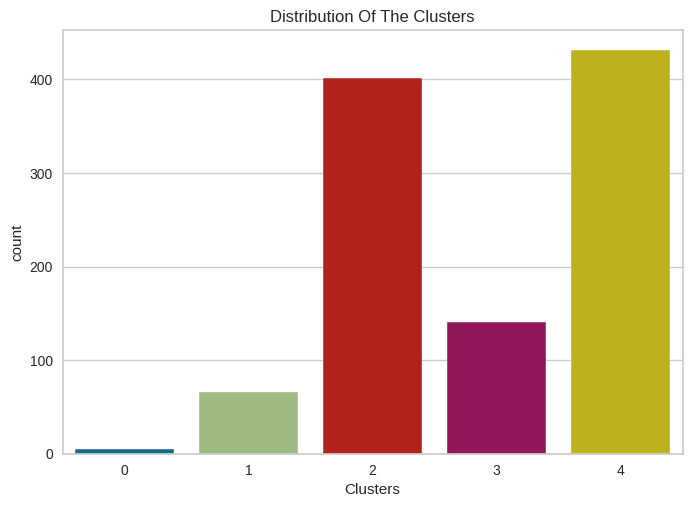

In [49]:
df_clust2= kmeans_cluster(df_reduced,5)

In [50]:
print_score(df_clust2)

Davies-Bouldin score:  1.0918504135247802
Silhouette score:  0.24806219261753984
Calinski-Harabas score:  374.47347048421574


In [51]:
lab_coded_3 = ['schoolsup','famsup','paid','activities','higher','romantic']

df_reduced_2 = dataframe.drop(['school','sex','Mjob','Fjob','nursery','subject','address','famsize','Pstatus','internet','health','reason','guardian'], axis=1)

for col in lab_coded_3:
    df_reduced_2[col] = lab_enc.fit_transform(df_reduced_2[col])

df_reduced_2.head()

age  Medu  Fedu  traveltime  studytime  failures  schoolsup  famsup  paid  \
0   18     4     4           2          2         0          1       0     0   
1   17     1     1           1          2         0          0       1     0   
2   15     1     1           1          2         3          1       0     1   
3   15     4     2           1          3         0          0       1     1   
4   16     3     3           1          2         0          0       1     1   

   activities  higher  romantic  famrel  freetime  goout  Dalc  Walc  \
0           0       1         0       4         3      4     1     1   
1           0       1         0       5         3      3     1     1   
2           0       1         0       4         3      2     2     3   
3           1       1         1       3         2      2     1     1   
4           0       1         0       4         3      2     1     2   

   absences  G1  G2  G3  
0         6   5   6   6  
1         4   5   5   6  
2        10   7   8  10  
3         2  15  14  15  
4         4   6  10  10

In [52]:
elbow(df_reduced_2,10)

Elbow Method to determine the number of clusters to be formed:


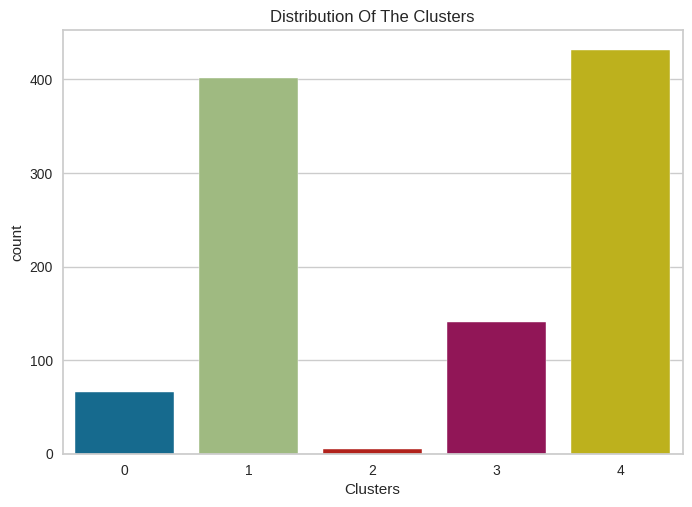

In [53]:
df_clust3= kmeans_cluster(df_reduced_2,5)

In [54]:
print_score(df_clust3)

Davies-Bouldin score:  1.027678556689972
Silhouette score:  0.26820340069583115
Calinski-Harabas score:  417.4758214170293


In [55]:
def print_score_label(df,labels):
    print("Davies-Bouldin score: ",davies_bouldin_score(df,labels)) # best 0
    print("Silhouette score: ",silhouette_score(df,labels)) # best 1
    print("Calinski-Harabas score: ",calinski_harabasz_score(df,labels)) # best +++

In [56]:
#pip install plotly
#pip install --upgrade nbformat
import plotly.express as px
from sklearn import decomposition

def cluster_3d(df,labels,alg: str):
    pca = decomposition.PCA(n_components=3)
    data_pca = pca.fit_transform(df)
    df = pd.DataFrame(data_pca, columns=['PC1','PC2','PC3'])
    df['cluster'] = labels
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='cluster',title=alg+" Clusters")
    fig.show()

In [57]:
from sklearn.cluster import Birch, SpectralClustering, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.mixture import GaussianMixture

def kmeans_clust(df,cluster_num):
    km = KMeans(n_clusters=cluster_num)
    labels = km.fit_predict(df)
    cluster_3d(df,labels,'KMeans')
    return labels

def agglomerative_cluster(df,cluster_num):
    AC=AgglomerativeClustering(n_clusters=cluster_num)
    labels = AC.fit_predict(df)
    cluster_3d(df,labels,'Agglomerative')
    return labels

def birch_cluster(df,cluster_num):
    brc=Birch(n_clusters=cluster_num)
    labels = brc.fit_predict(df)
    cluster_3d(df,labels,'Birch')
    return labels

def gm_cluster(df,cluster_num):
    gm=GaussianMixture(n_components=cluster_num,covariance_type='spherical',n_init=10,random_state=42)
    labels = gm.fit_predict(df)
    cluster_3d(df,labels,'Gaussian Mixture')
    return labels

def spectral_cluster(df,cluster_num):
    spec=SpectralClustering(n_clusters=cluster_num)
    labels = spec.fit_predict(df)
    cluster_3d(df,labels,'Spectral')
    return labels

def meanshift_cluster(df,cluster_num=-1):
    bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=100)
    meanshift = MeanShift(n_jobs=-1,bandwidth=bandwidth, bin_seeding=True)
    labels = meanshift.fit_predict(df)
    cluster_3d(df,labels,'Meanshift')
    return labels

def dbscan_cluster(df,cluster_num=-1):
    dbscan = DBSCAN(n_jobs=-1)
    labels = dbscan.fit_predict(df)
    cluster_3d(df,labels,'DBSCAN')
    return labels


In [58]:
print_score_label(df_reduced_2,kmeans_clust(df_reduced_2,5))
print_score_label(df_reduced_2,agglomerative_cluster(df_reduced_2,5))
print_score_label(df_reduced_2,birch_cluster(df_reduced_2,5))
print_score_label(df_reduced_2,gm_cluster(df_reduced_2,5))
print_score_label(df_reduced_2,spectral_cluster(df_reduced_2,2)) #error na !=2 cluster-a; ~4min
print_score_label(df_reduced_2,meanshift_cluster(df_reduced_2,5))
#print_score_label(df_reduced_2,dbscan_cluster(df_reduced_2,5)) #1 cluster

Davies-Bouldin score:  1.0177080895113413
Silhouette score:  0.2708025084579061
Calinski-Harabas score:  417.5384421203915


Davies-Bouldin score:  1.0711775193012611
Silhouette score:  0.2221782040347902
Calinski-Harabas score:  347.2403699490041


Davies-Bouldin score:  1.383738586560994
Silhouette score:  0.1870543848144557
Calinski-Harabas score:  327.064194081964


Davies-Bouldin score:  1.1788609729680326
Silhouette score:  0.2490482226401074
Calinski-Harabas score:  387.17569571876464


Davies-Bouldin score:  0.11155515141622187
Silhouette score:  0.835349315087718
Calinski-Harabas score:  61.912500103083914


Davies-Bouldin score:  1.1149699691781212
Silhouette score:  0.33775654944432315
Calinski-Harabas score:  185.1248647069929


In [59]:
from sklearn.decomposition import PCA

def pca(df):
    pca = PCA()
    new_data = pca.fit_transform(df)
    return pd.DataFrame(new_data)

In [60]:
df_pca=pca(df_reduced_2)
df_pca.shape

(1044, 21)

Elbow Method to determine the number of clusters to be formed:


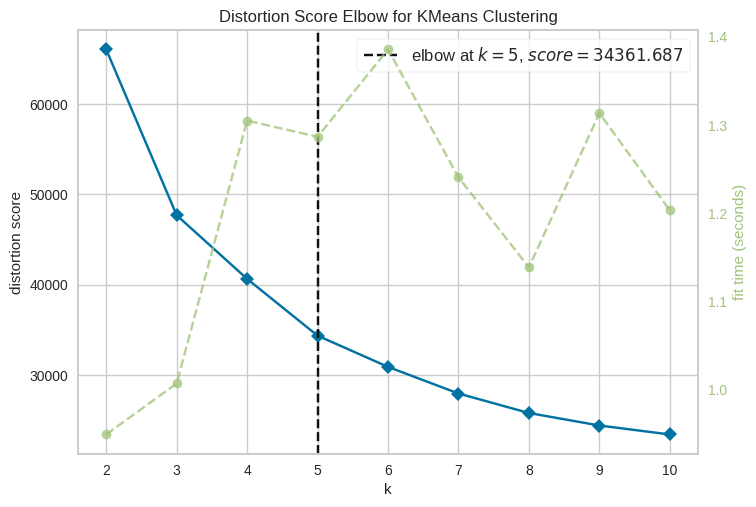

In [61]:
elbow(df_pca,10)

In [62]:
print_score_label(df_pca,kmeans_clust(df_pca,5))
print_score_label(df_pca,agglomerative_cluster(df_pca,5))
print_score_label(df_pca,birch_cluster(df_pca,5))
print_score_label(df_pca,gm_cluster(df_pca,5))
print_score_label(df_pca,meanshift_cluster(df_pca,5))

Davies-Bouldin score:  1.0271153010701426
Silhouette score:  0.2674529314918512
Calinski-Harabas score:  417.340526214825


Davies-Bouldin score:  1.1916943405071088
Silhouette score:  0.20102683372633504
Calinski-Harabas score:  369.9664182603142


Davies-Bouldin score:  1.1916943405071088
Silhouette score:  0.20102683372633504
Calinski-Harabas score:  369.9664182603142


Davies-Bouldin score:  1.1788609729680322
Silhouette score:  0.2490482226401075
Calinski-Harabas score:  387.17569571876464


Davies-Bouldin score:  0.7304162654354021
Silhouette score:  0.2611029041772955
Calinski-Harabas score:  120.46200031849423


In [63]:
def progressiveFeatureSelection(df, n_clusters=3, max_features=4,):
    '''
    very basic implementation of an algorithm for feature selection (unsupervised clustering); inspired by this post: https://datascience.stackexchange.com/questions/67040/how-to-do-feature-selection-for-clustering-and-implement-it-in-python
    '''
    feature_list = list(df.columns)
    selected_features = list()
    # select starting feature
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        data_ = df[feature]
        labels = kmeans.fit_predict(data_.to_frame())
        score_ = silhouette_score(data_.to_frame(), labels)
        print("Proposed new feature {} with score {}". format(feature, score_))
        if score_ >= high_score:
            initial_feature = feature
            high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

In [64]:
selected = progressiveFeatureSelection(df_reduced_2, max_features=10, n_clusters=5)
df_pfs = df_reduced_2[selected]

Proposed new feature age with score 0.9767199733466599
Proposed new feature Medu with score 1.0
Proposed new feature Fedu with score 1.0
Proposed new feature traveltime with score 1.0
Proposed new feature studytime with score 1.0


/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.



Proposed new feature failures with score 1.0


/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.



Proposed new feature schoolsup with score 1.0
Proposed new feature famsup with score 1.0
Proposed new feature paid with score 1.0
Proposed new feature activities with score 1.0


/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.

/home/milos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:996: ConvergenceWarning:

Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.



Proposed new feature higher with score 1.0
Proposed new feature romantic with score 1.0
Proposed new feature famrel with score 1.0
Proposed new feature freetime with score 1.0
Proposed new feature goout with score 1.0
Proposed new feature Dalc with score 1.0
Proposed new feature Walc with score 1.0
Proposed new feature absences with score 0.6700113227073242
Proposed new feature G1 with score 0.6275421377904444
Proposed new feature G2 with score 0.5989137473191749
Proposed new feature G3 with score 0.6224930838469187
The initial feature is Walc with a silhouette score of 1.0.
Starting selection 0...
Proposed new feature age with score 0.44684792610062696
Proposed new feature Medu with score 0.5109990516074676
Proposed new feature Fedu with score 0.4860220113862828
Proposed new feature traveltime with score 0.5682067868415297
Proposed new feature studytime with score 0.5196769712670968
Proposed new feature failures with score 0.7349795335348078
Proposed new feature schoolsup with score 0

In [65]:
df_pfs.shape

(1044, 10)

Elbow Method to determine the number of clusters to be formed:


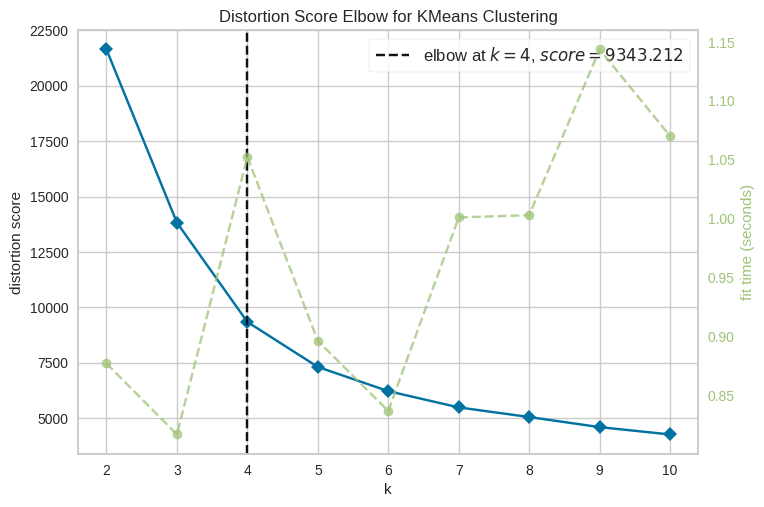

In [66]:
elbow(df_pfs,10)

In [67]:
print_score_label(df_pfs,kmeans_clust(df_pfs,4))
print_score_label(df_pfs,agglomerative_cluster(df_pfs,4))
print_score_label(df_pfs,birch_cluster(df_pfs,4))
print_score_label(df_pfs,gm_cluster(df_pfs,4))
print_score_label(df_pfs,meanshift_cluster(df_pfs,4))

Davies-Bouldin score:  0.6876946821174548
Silhouette score:  0.47736038390056984
Calinski-Harabas score:  1299.595562341312


Davies-Bouldin score:  0.5838808335437867
Silhouette score:  0.5502111673343466
Calinski-Harabas score:  981.2191691732423


Davies-Bouldin score:  0.693550295487393
Silhouette score:  0.4315699360170204
Calinski-Harabas score:  1198.6654903330389


Davies-Bouldin score:  0.9207297214875744
Silhouette score:  0.36836586892113077
Calinski-Harabas score:  957.0528933141429


Davies-Bouldin score:  0.37051907848154036
Silhouette score:  0.5932181258616323
Calinski-Harabas score:  464.66718024941525


In [68]:
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import MinMaxScaler

In [69]:
def standardize(df,to_scale):
    scaler = MinMaxScaler()
    to_transform=df.drop([x for x in df.columns if x not in to_scale], axis=1)
    scaled = pd.DataFrame(scaler.fit_transform(to_transform))
    new_df = df.copy(deep=True)
    for index,col in enumerate(to_scale):
        new_df[col]=scaled[index]
    new_df.dropna(inplace=True)
    return new_df

def remove_outliers(df, cols, factor=0.1):
    standard=standardize(df, cols)
    outlier_detector = EllipticEnvelope(contamination=factor)
    outlier_detector.fit(standard)
    outlier_array= outlier_detector.predict(standard)
    to_drop=[]
    for index,x in enumerate(outlier_array):
        if x==-1:
            to_drop.append(index)

    standard.drop(standard.index[to_drop],inplace=True)
    return standardize(standard, cols)

In [70]:
df_no_outliers= remove_outliers(df_pfs, list(df_pfs.columns))

<AxesSubplot: >

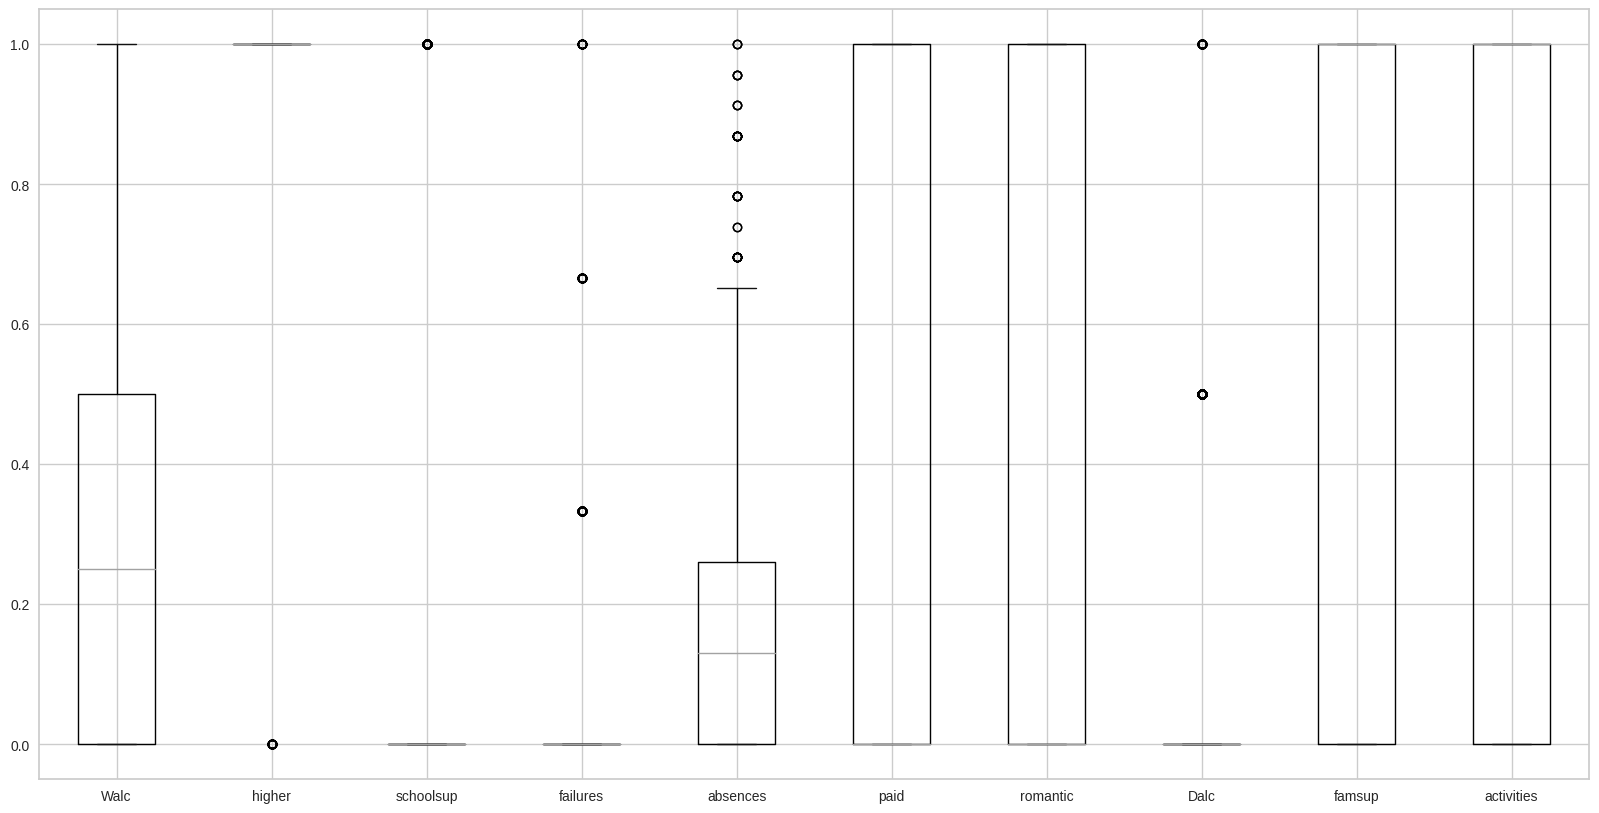

In [71]:
df_no_outliers.boxplot(column= list(df_pfs.columns), figsize=(20,10))

Elbow Method to determine the number of clusters to be formed:


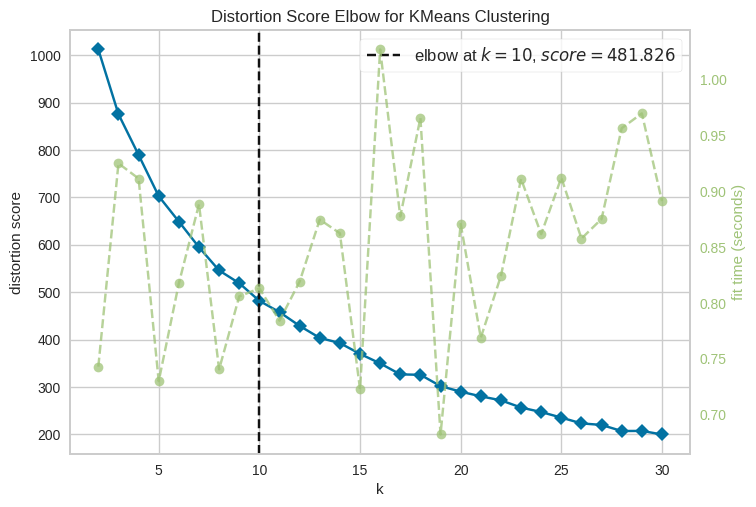

In [72]:
elbow(df_no_outliers,30)

In [74]:
print_score_label(df_no_outliers,kmeans_clust(df_no_outliers,10))
print_score_label(df_no_outliers,agglomerative_cluster(df_no_outliers,10))
print_score_label(df_no_outliers,birch_cluster(df_no_outliers,10))
print_score_label(df_no_outliers,gm_cluster(df_no_outliers,10))
# print_score_label(df_no_outliers,meanshift_cluster(df_no_outliers,10)) # error 1 cluster

Davies-Bouldin score:  1.2700907821685625
Silhouette score:  0.3212860230294615
Calinski-Harabas score:  170.05967500540285


Davies-Bouldin score:  1.2775188346058013
Silhouette score:  0.29561223420245797
Calinski-Harabas score:  157.298478193397


Davies-Bouldin score:  1.434809043828475
Silhouette score:  0.2718891513105561
Calinski-Harabas score:  127.41599728532384


Davies-Bouldin score:  1.415285868968007
Silhouette score:  0.10281486030102027
Calinski-Harabas score:  60.91496911705186
